- CONTEXT: <br>
The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete
and 5 continuous attributes

- DATA DESCRIPTION:<br>
The data concerns city-cycle fuel consumption in miles per gallon

-  Attribute Information:
    1. mpg: continuous
    2. cylinders: multi-valued discrete
    3. displacement: continuous
    4. horsepower: continuous
    5. weight: continuous
    6. acceleration: continuous
    7. model year: multi-valued discrete
    8. origin: multi-valued discrete
    9. car name: string (unique for each instance)

# Project Objective:
Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’
Steps and tasks:

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src.viz import plot_histogram_with_stats, plot_boxplot, \
    plot_corr
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300

In [2]:
# reading the file
df = pd.read_csv('../data/auto-mpg.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_').str.strip()

In [3]:
df.sample(5)

mpg  cylinders  displacement horsepower  weight  acceleration  \
335  35.0          4         122.0         88    2500          15.1   
153  18.0          6         250.0        105    3459          16.0   
67   11.0          8         429.0        208    4633          11.0   
56   26.0          4          91.0         70    1955          20.5   
199  20.0          6         225.0        100    3651          17.7   

     model_year  origin           car_name  
335          80       2  triumph tr7 coupe  
153          75       1     chevrolet nova  
67           72       1    mercury marquis  
56           71       1   plymouth cricket  
199          76       1     dodge aspen se

In [4]:
df.shape

(398, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
# making a list for categorical columns and numerical columns
cat_columns = df.loc[:,df.dtypes == 'object'].columns.tolist()
num_columns = df.describe().columns.to_list()

In [7]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model_year       13
origin            3
car_name        305
dtype: int64

In [8]:
df.describe().T

count         mean         std     min       25%     50%  \
mpg           398.0    23.514573    7.815984     9.0    17.500    23.0   
cylinders     398.0     5.454774    1.701004     3.0     4.000     4.0   
displacement  398.0   193.425879  104.269838    68.0   104.250   148.5   
weight        398.0  2970.424623  846.841774  1613.0  2223.750  2803.5   
acceleration  398.0    15.568090    2.757689     8.0    13.825    15.5   
model_year    398.0    76.010050    3.697627    70.0    73.000    76.0   
origin        398.0     1.572864    0.802055     1.0     1.000     1.0   

                   75%     max  
mpg             29.000    46.6  
cylinders        8.000     8.0  
displacement   262.000   455.0  
weight        3608.000  5140.0  
acceleration    17.175    24.8  
model_year      79.000    82.0  
origin           2.000     3.0

In [9]:
df['origin'] = df['origin'].astype(str)
df['model_year'] = df['model_year'].astype(str)

In [10]:
print("char column before :", cat_columns)
print("numerical columns before :", num_columns)
print("--"*50)

char_col = df.loc[: , df.dtypes == 'object'].columns.tolist()
num_col = df.describe().columns.tolist()

print("char column after :", char_col)
print("numerical columns after :", num_col)

char column before : ['horsepower', 'car_name']
numerical columns before : ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model_year', 'origin']
----------------------------------------------------------------------------------------------------
char column after : ['horsepower', 'model_year', 'origin', 'car_name']
numerical columns after : ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration']


# Data Cleaning

In [11]:
# checking for numerical values in categorical columns
for i in cat_columns:
    t = df[df[i].astype(str).str.isdigit() == False].shape[0]
    print('Non-numerical values in column',i,t)

# there are records that hold the "?" as value in horsepower
df['horsepower'] = df['horsepower'].replace({'?':np.nan})

# filling the nan values with median
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
df['horsepower'] = pd.to_numeric(df['horsepower'])

Non-numerical values in column horsepower 6
Non-numerical values in column car_name 398


In [12]:
print("char column before :", cat_columns)
print("numerical columns before :", num_columns)
print("--"*50)

cat_columns = df.loc[: , df.dtypes == 'object'].columns.tolist()
num_columns = df.describe().columns.tolist()

print("char column after :", char_col)
print("numerical columns after :", num_col)

char column before : ['horsepower', 'car_name']
numerical columns before : ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model_year', 'origin']
----------------------------------------------------------------------------------------------------
char column after : ['horsepower', 'model_year', 'origin', 'car_name']
numerical columns after : ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration']


# Data Analysis and Visualisation

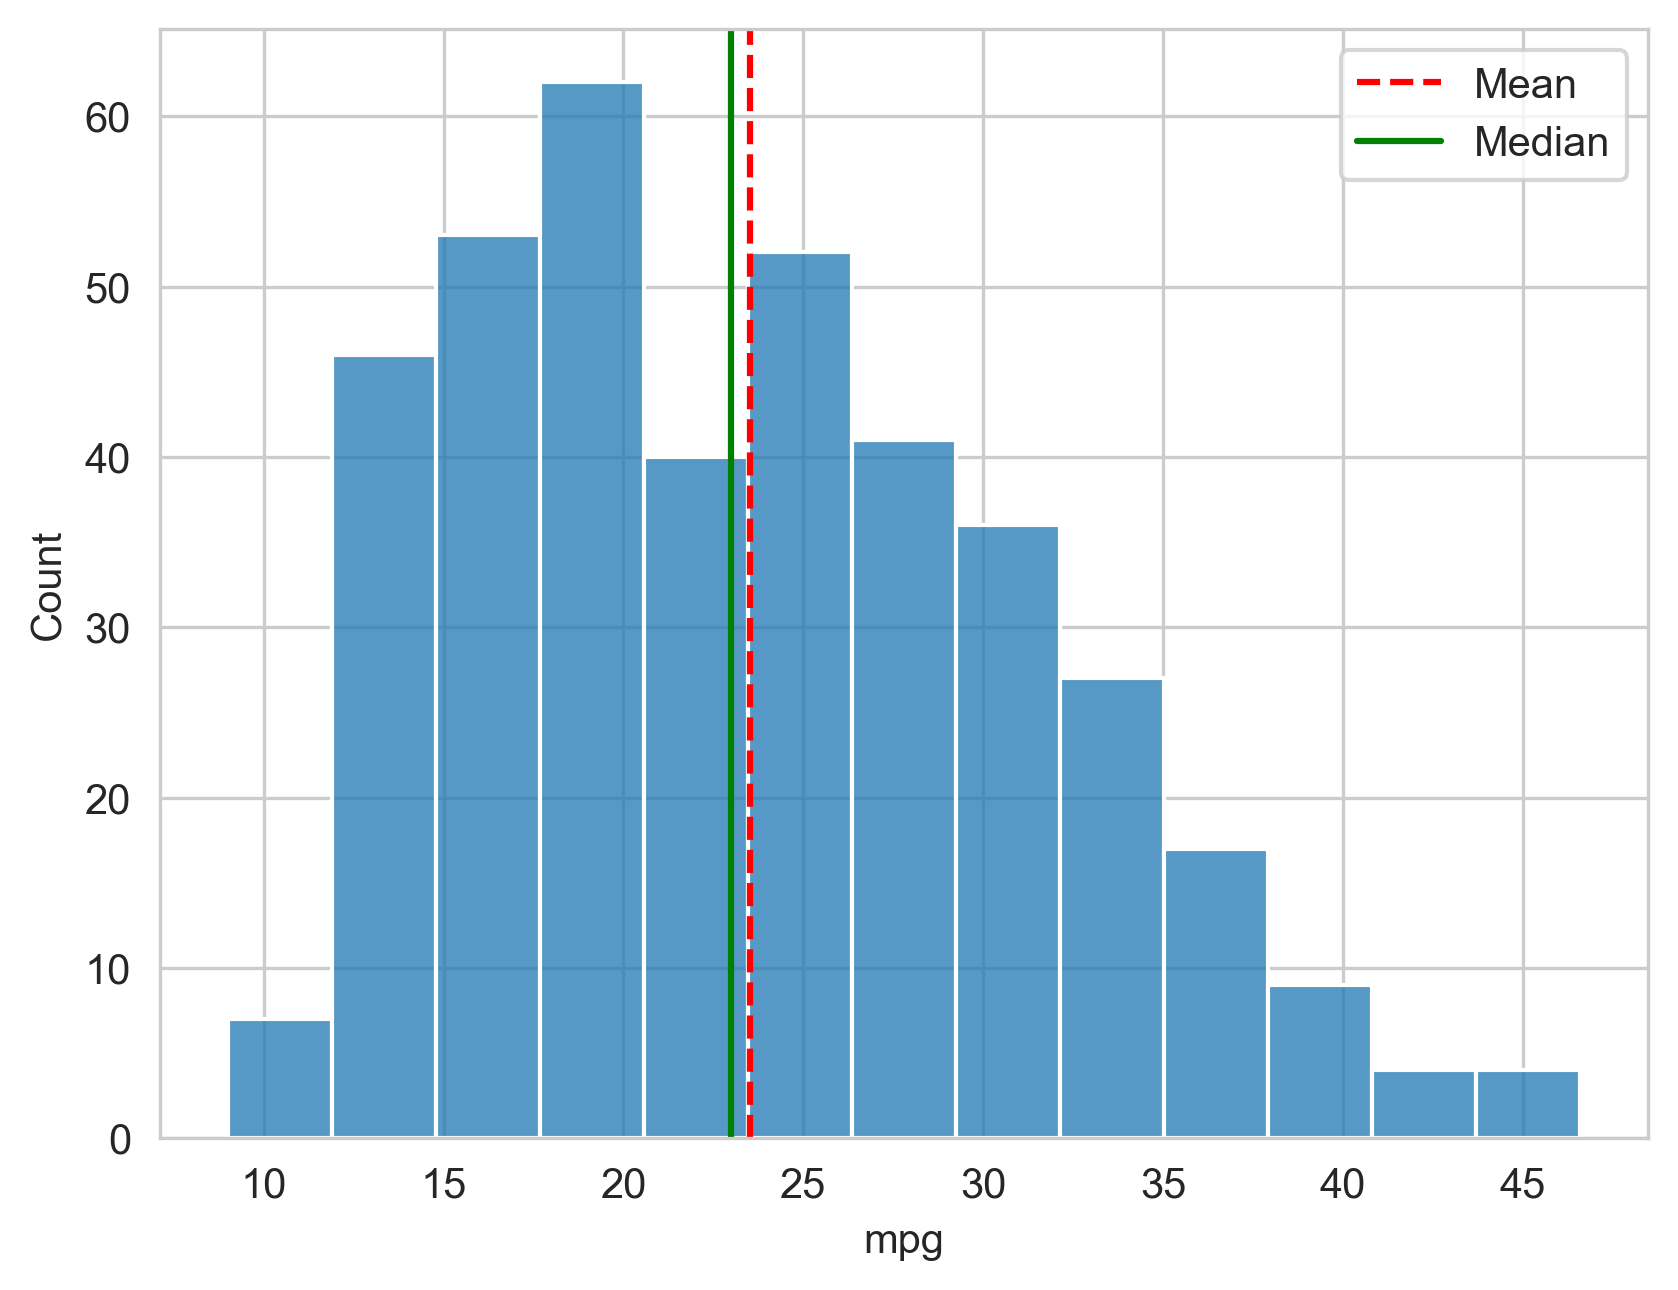

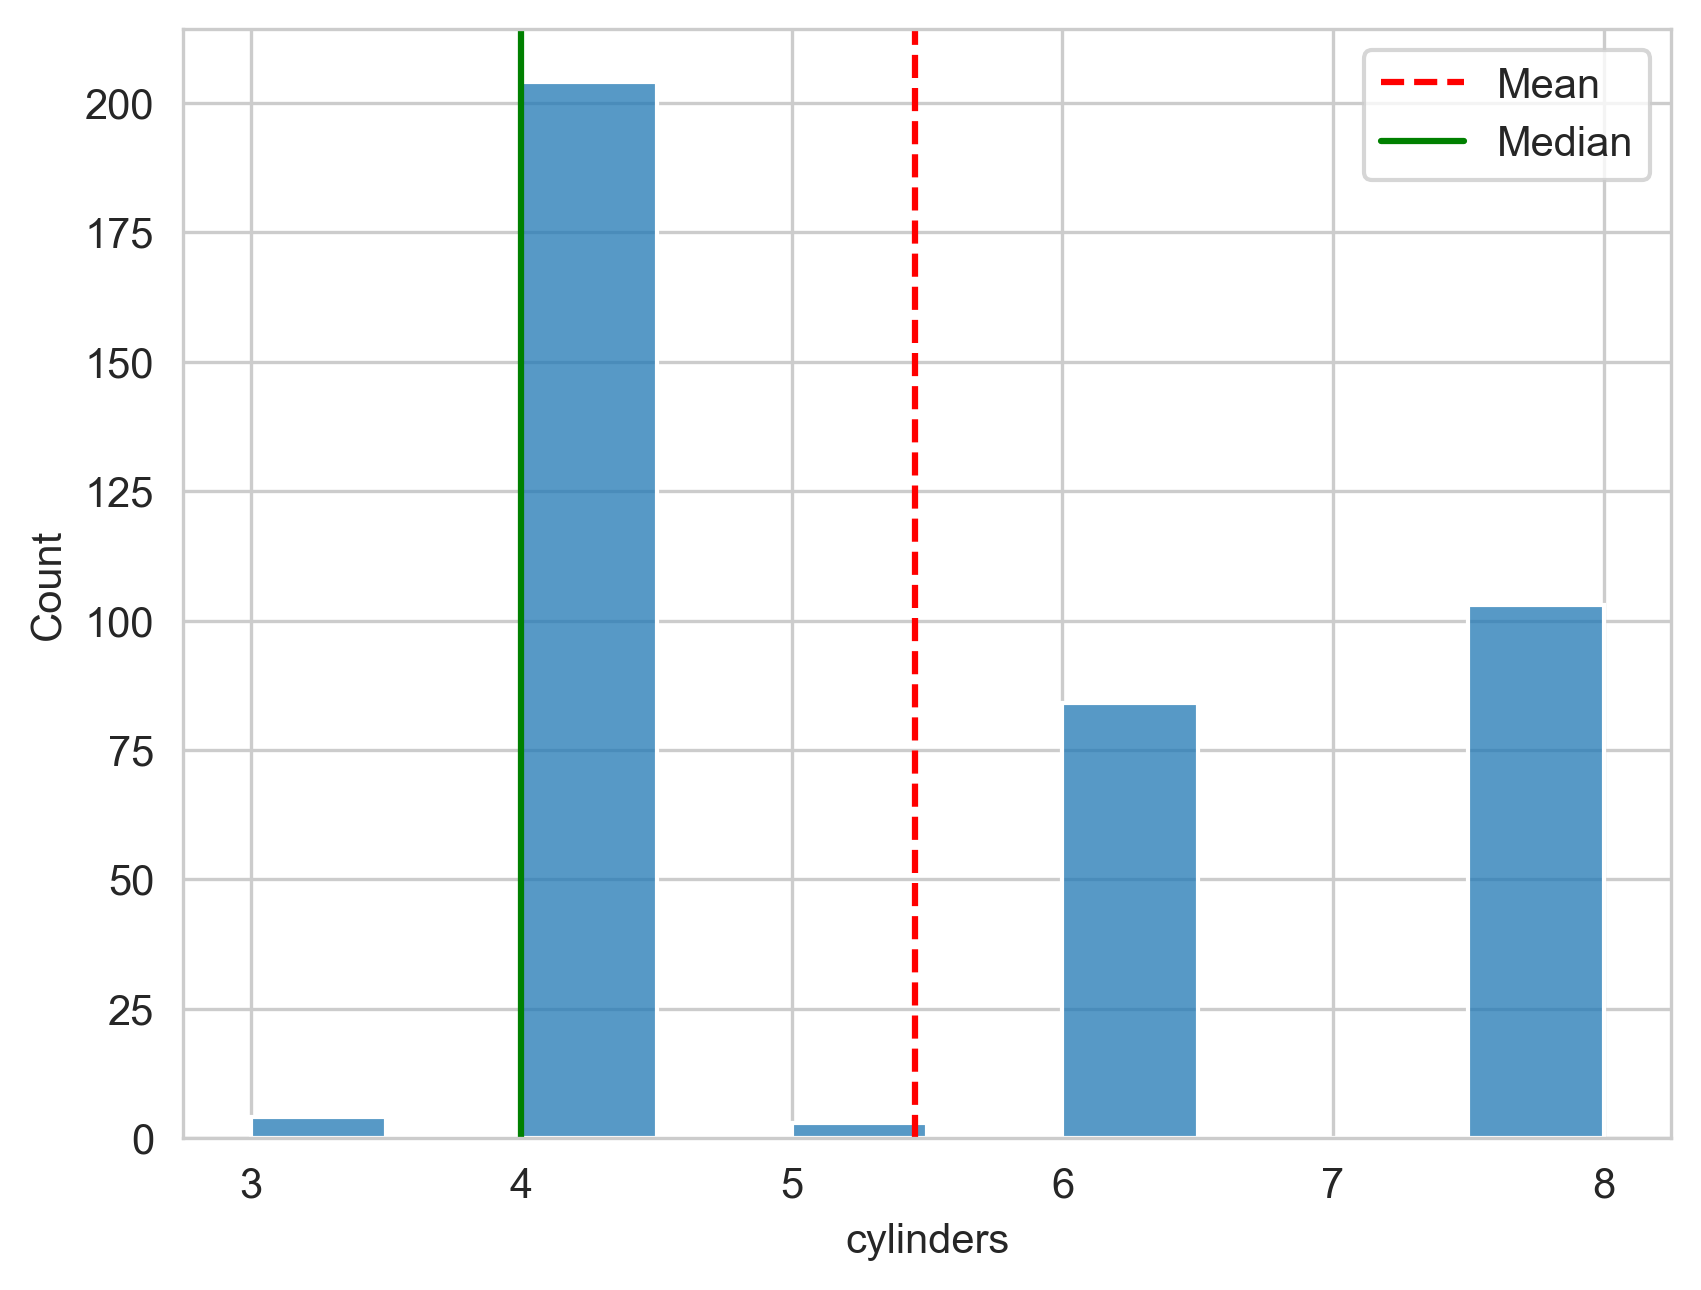

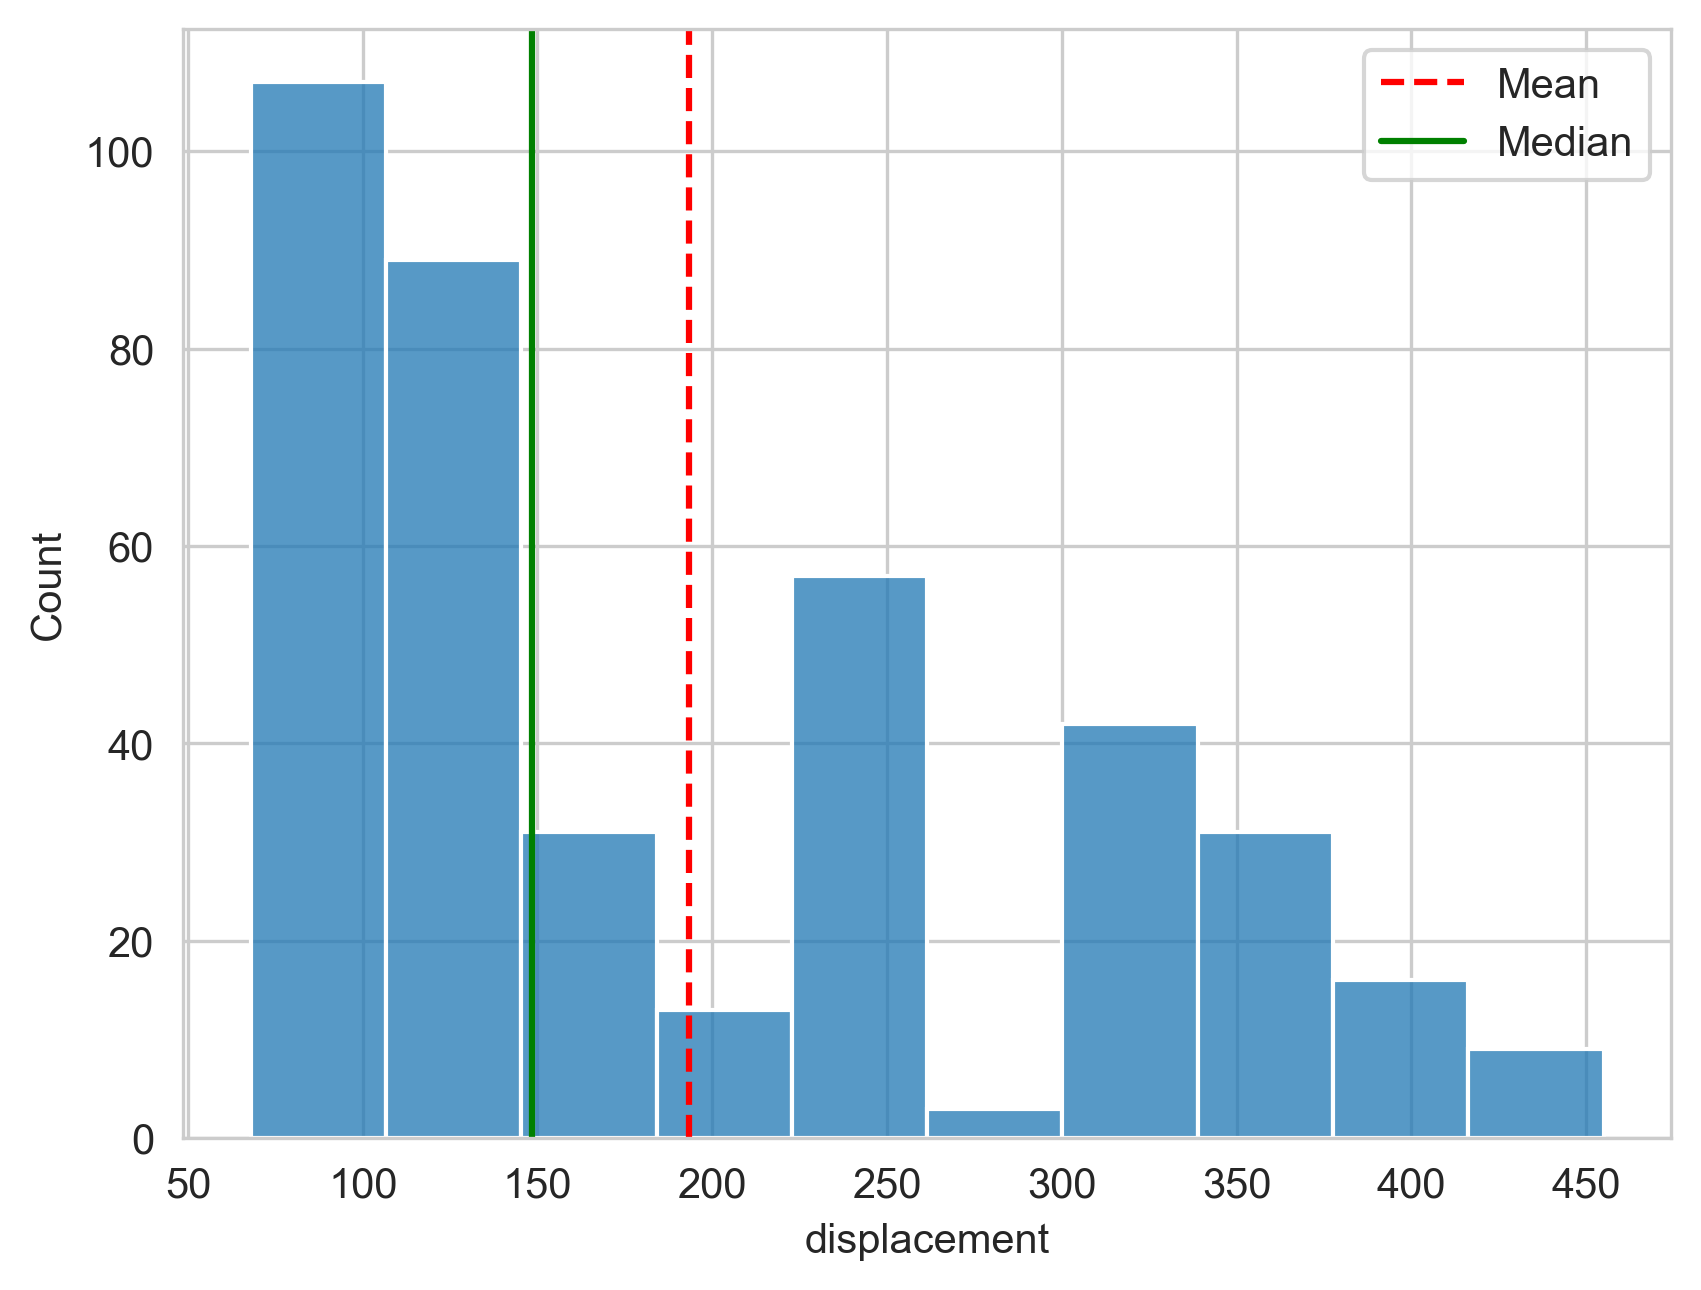

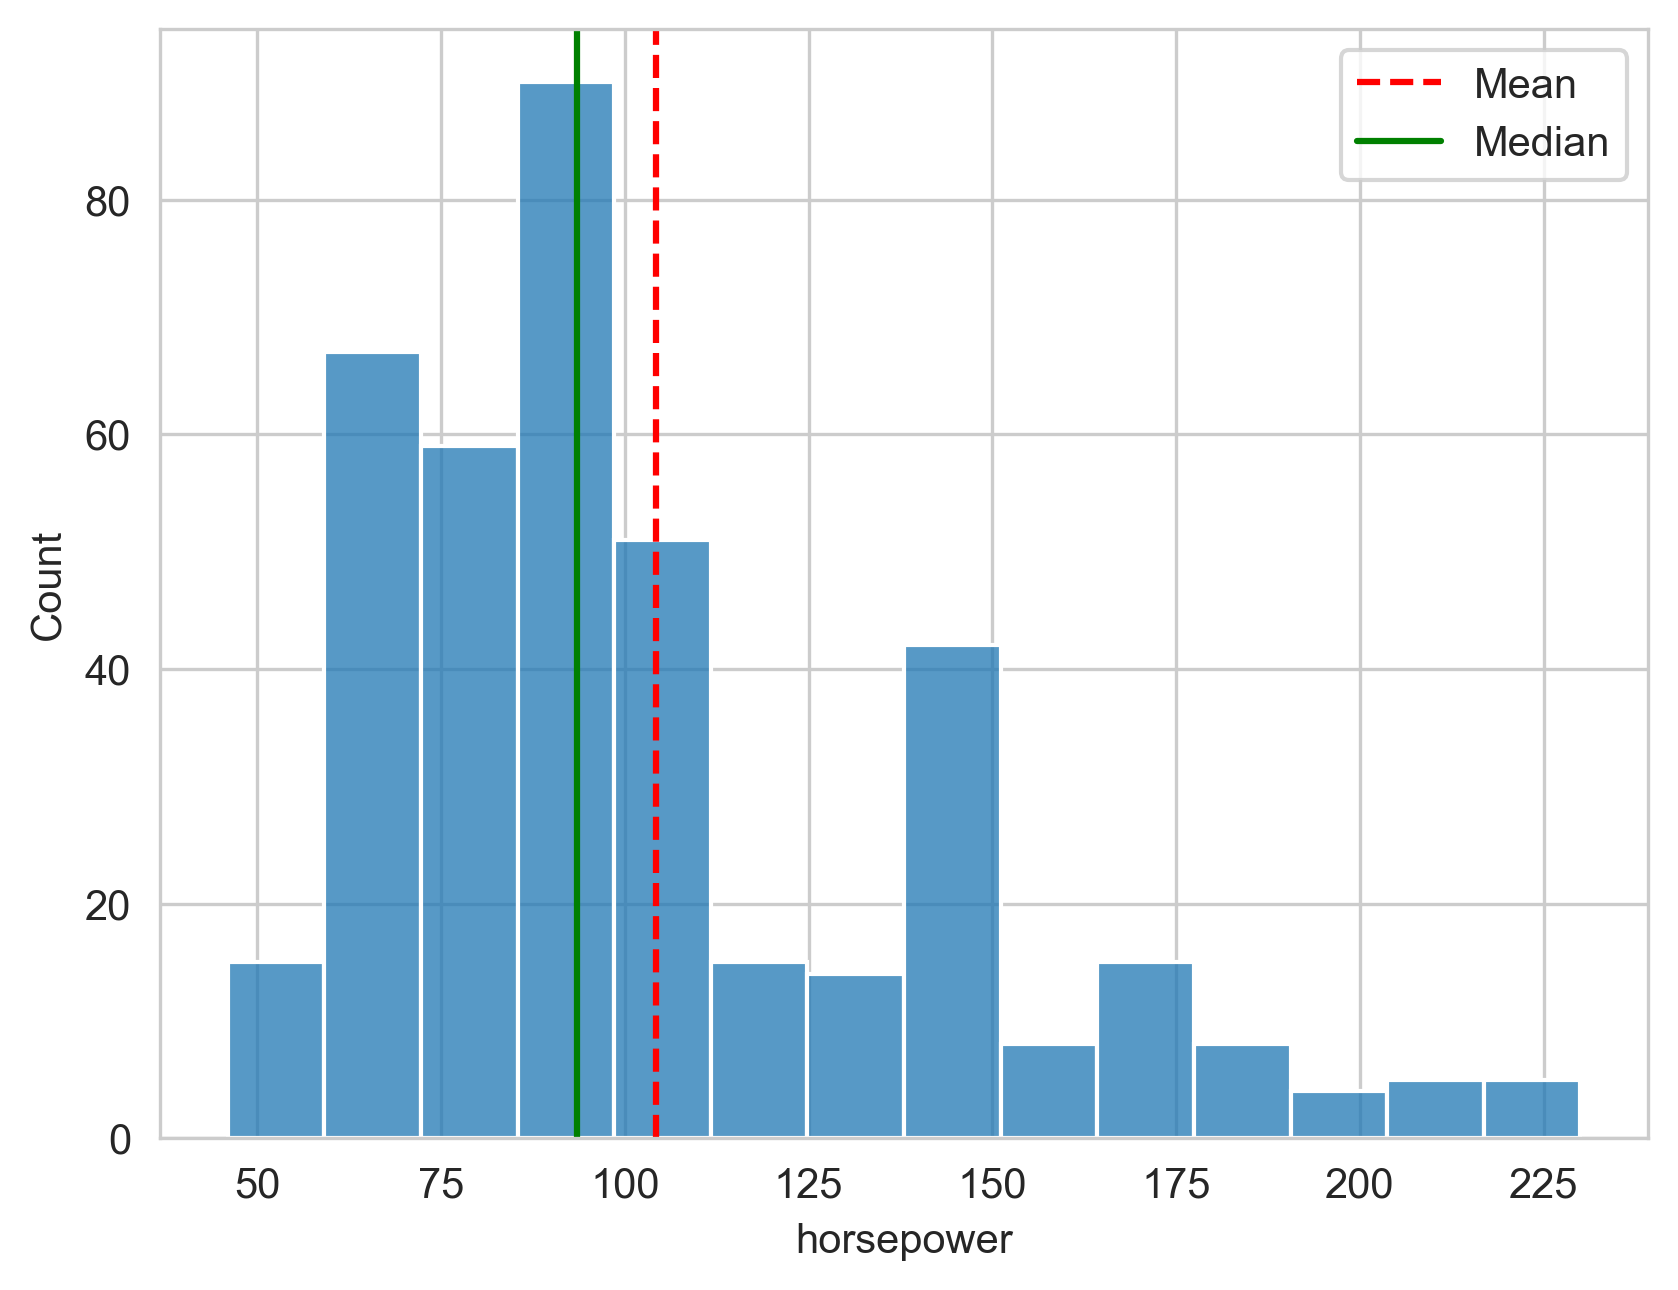

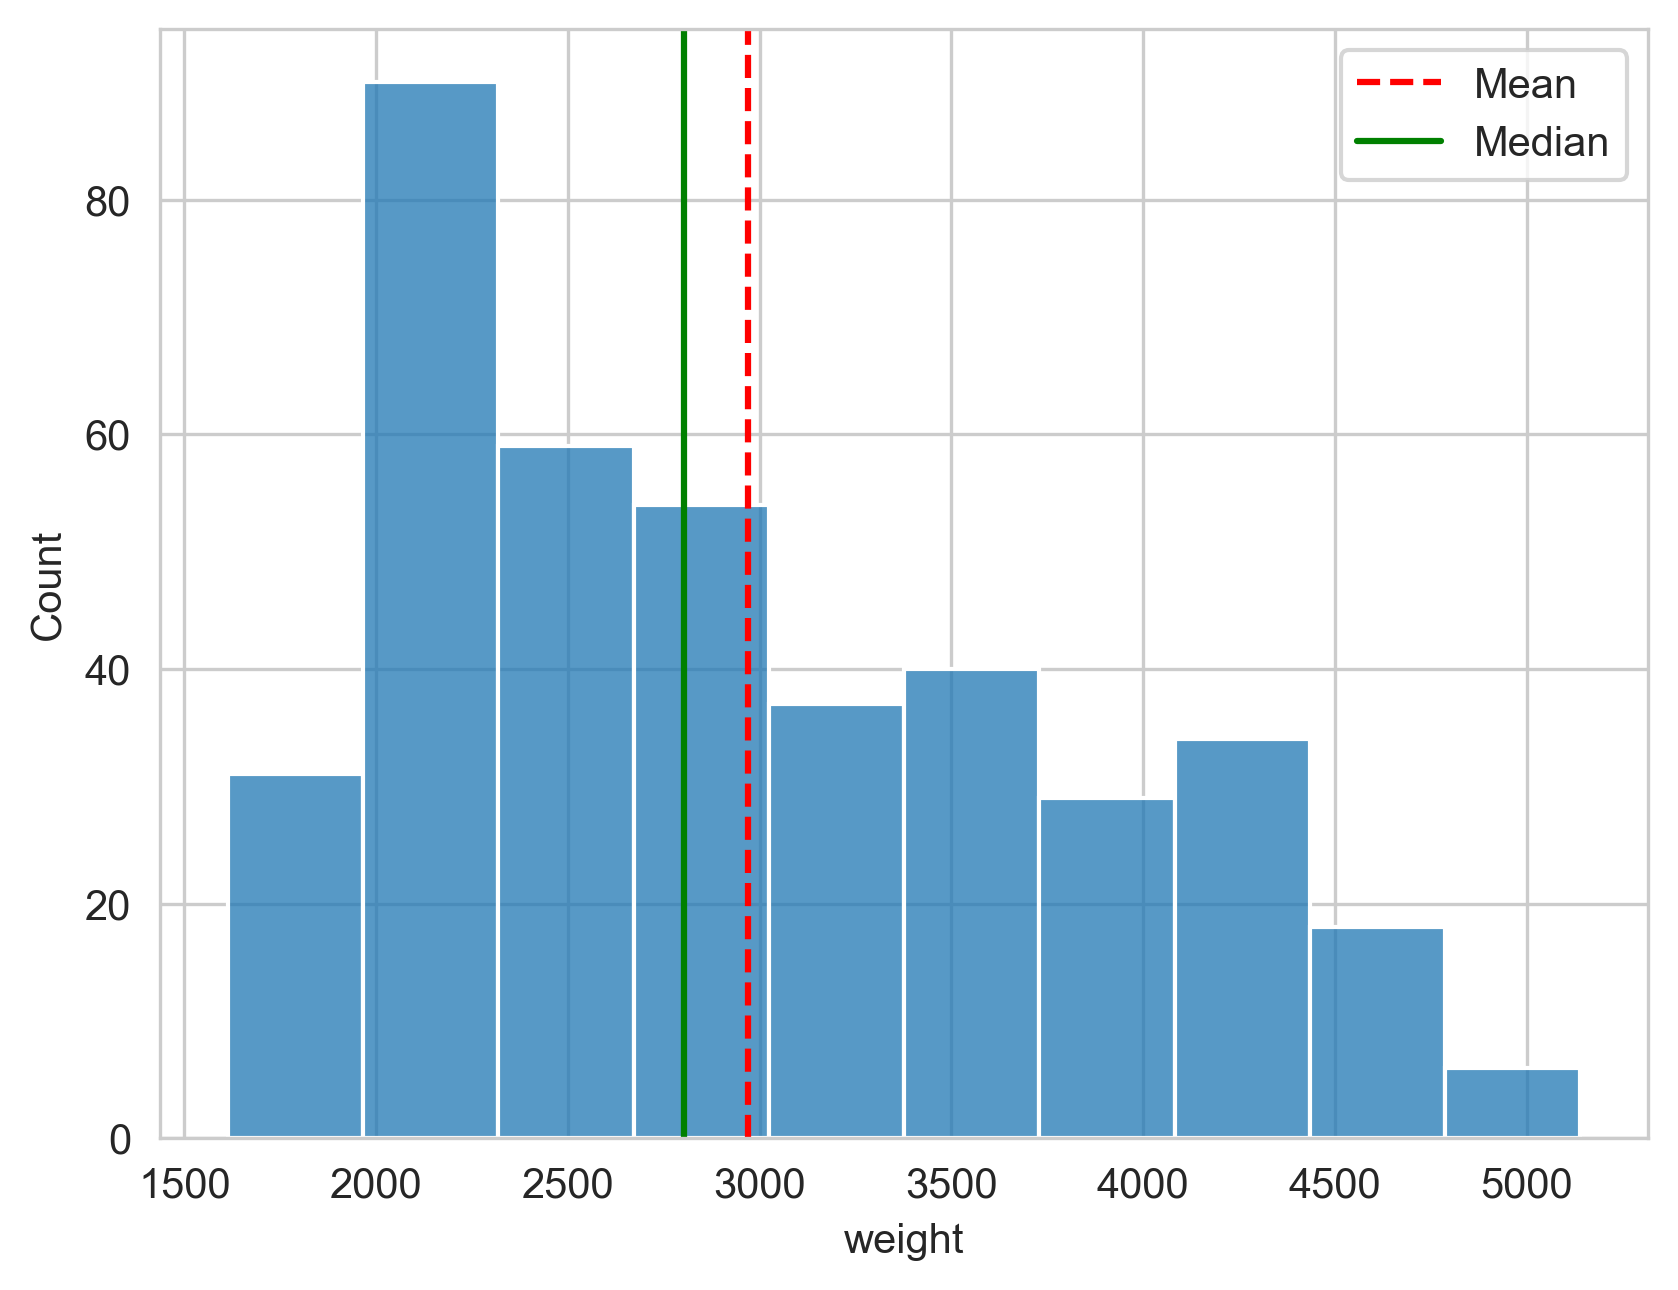

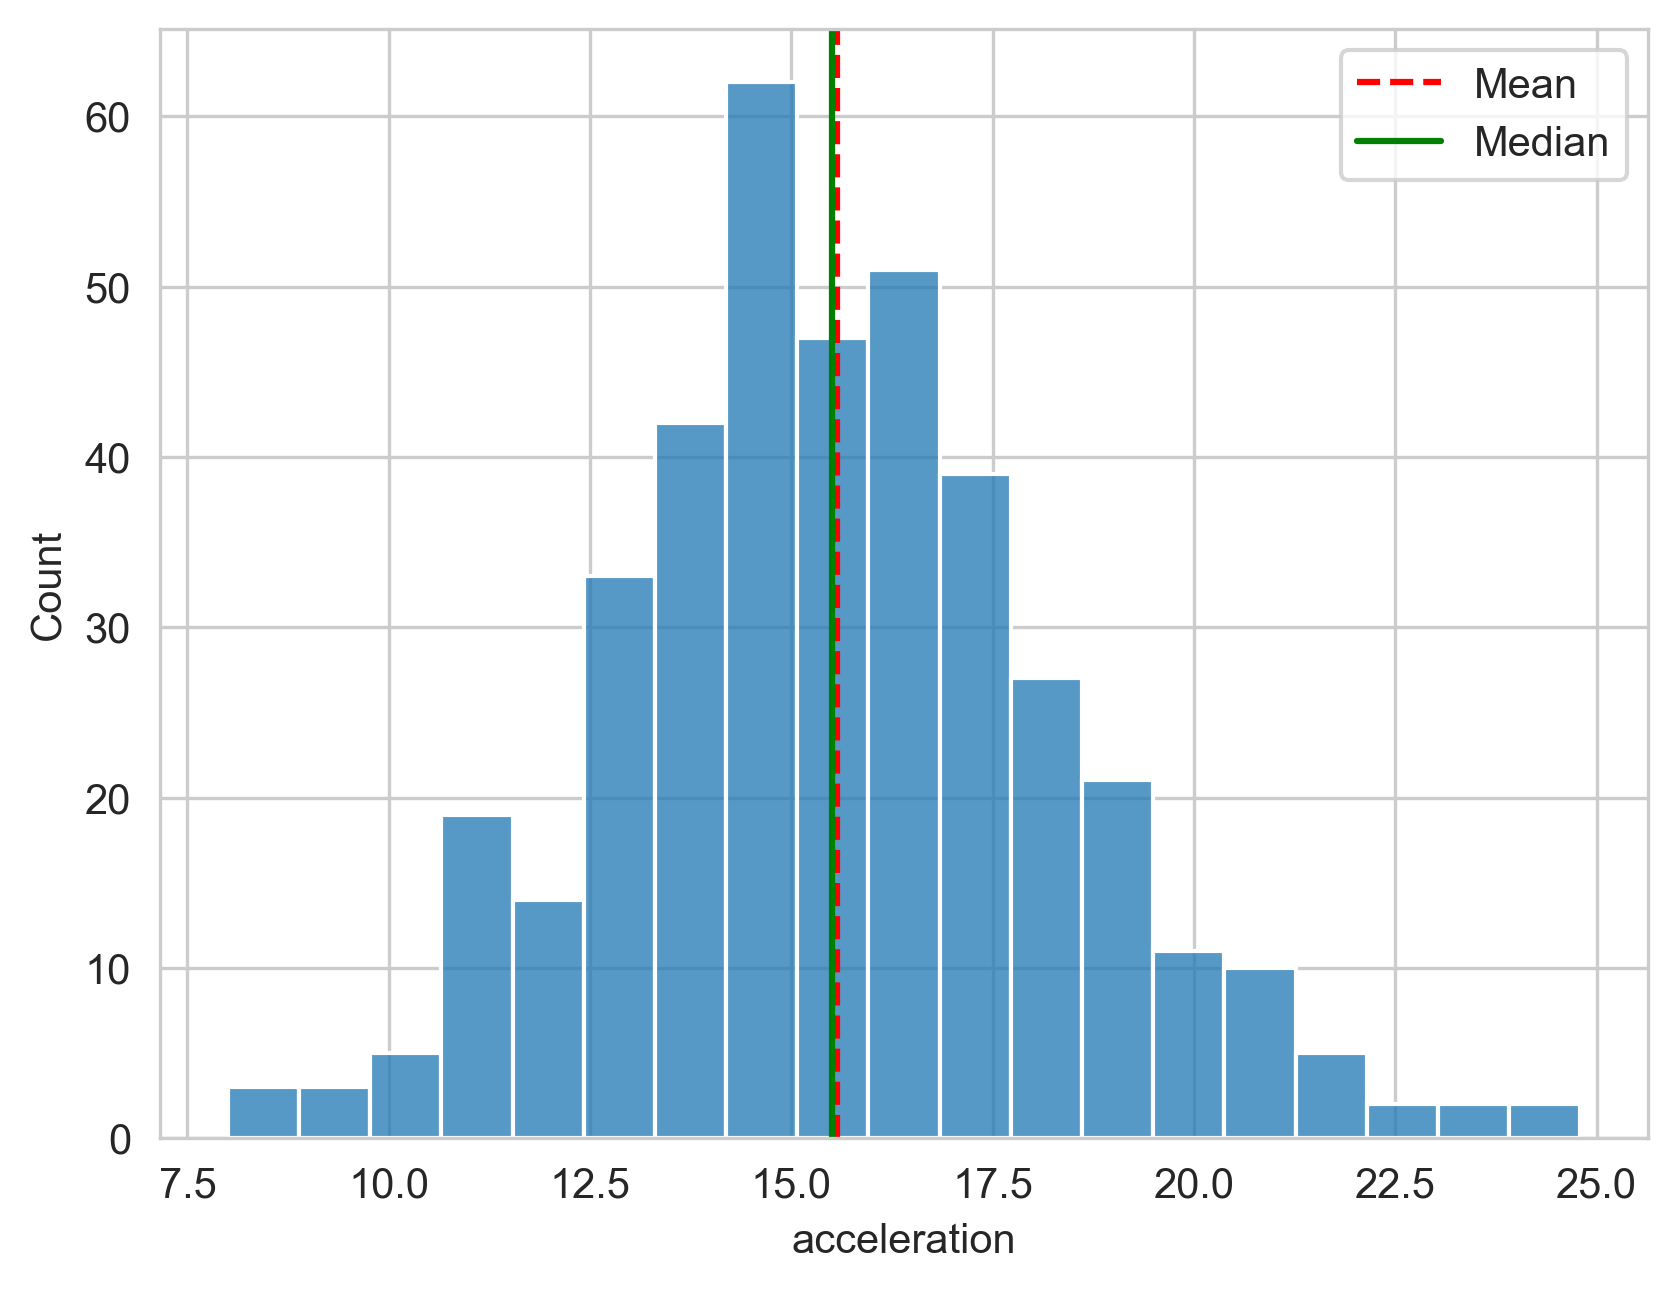

In [13]:
for column_name in df.describe().columns.to_list():
    plot_histogram_with_stats(df[column_name])

In [18]:
print(num_columns)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']


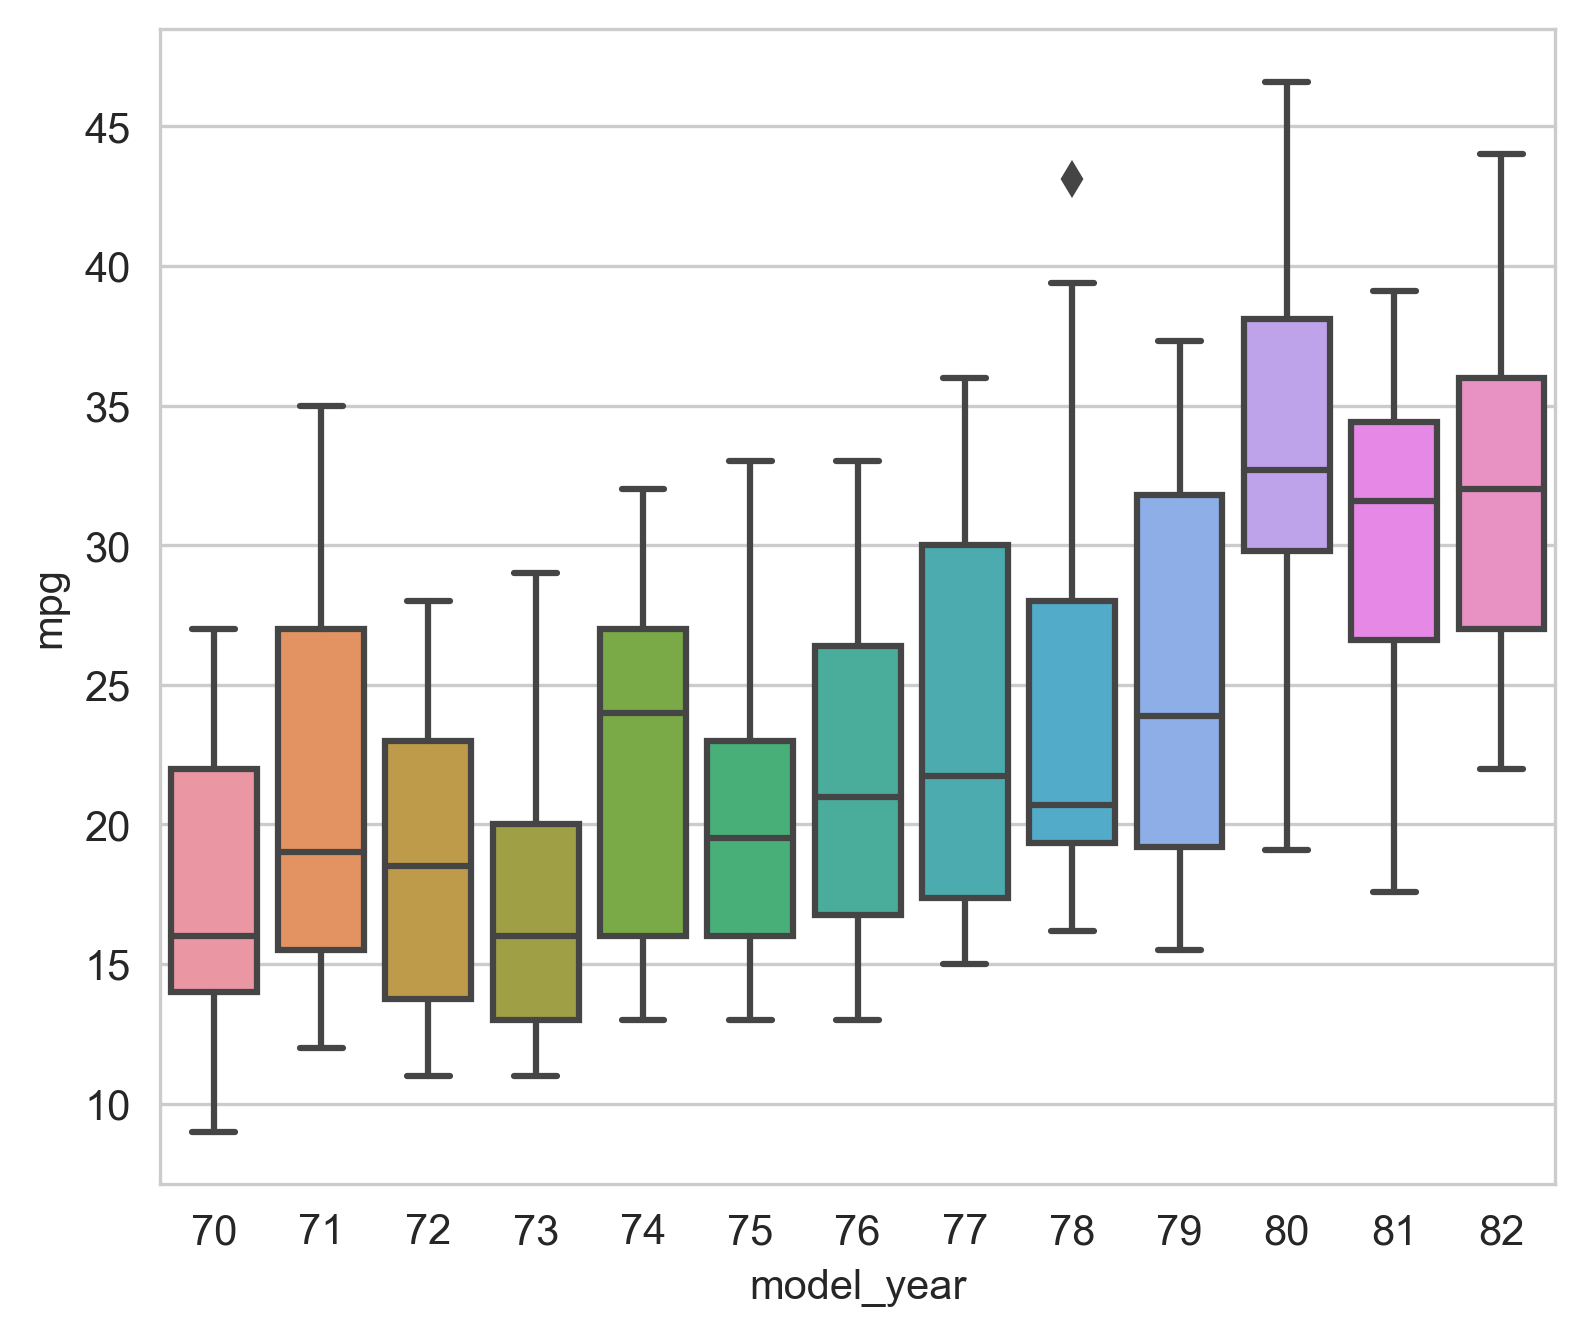

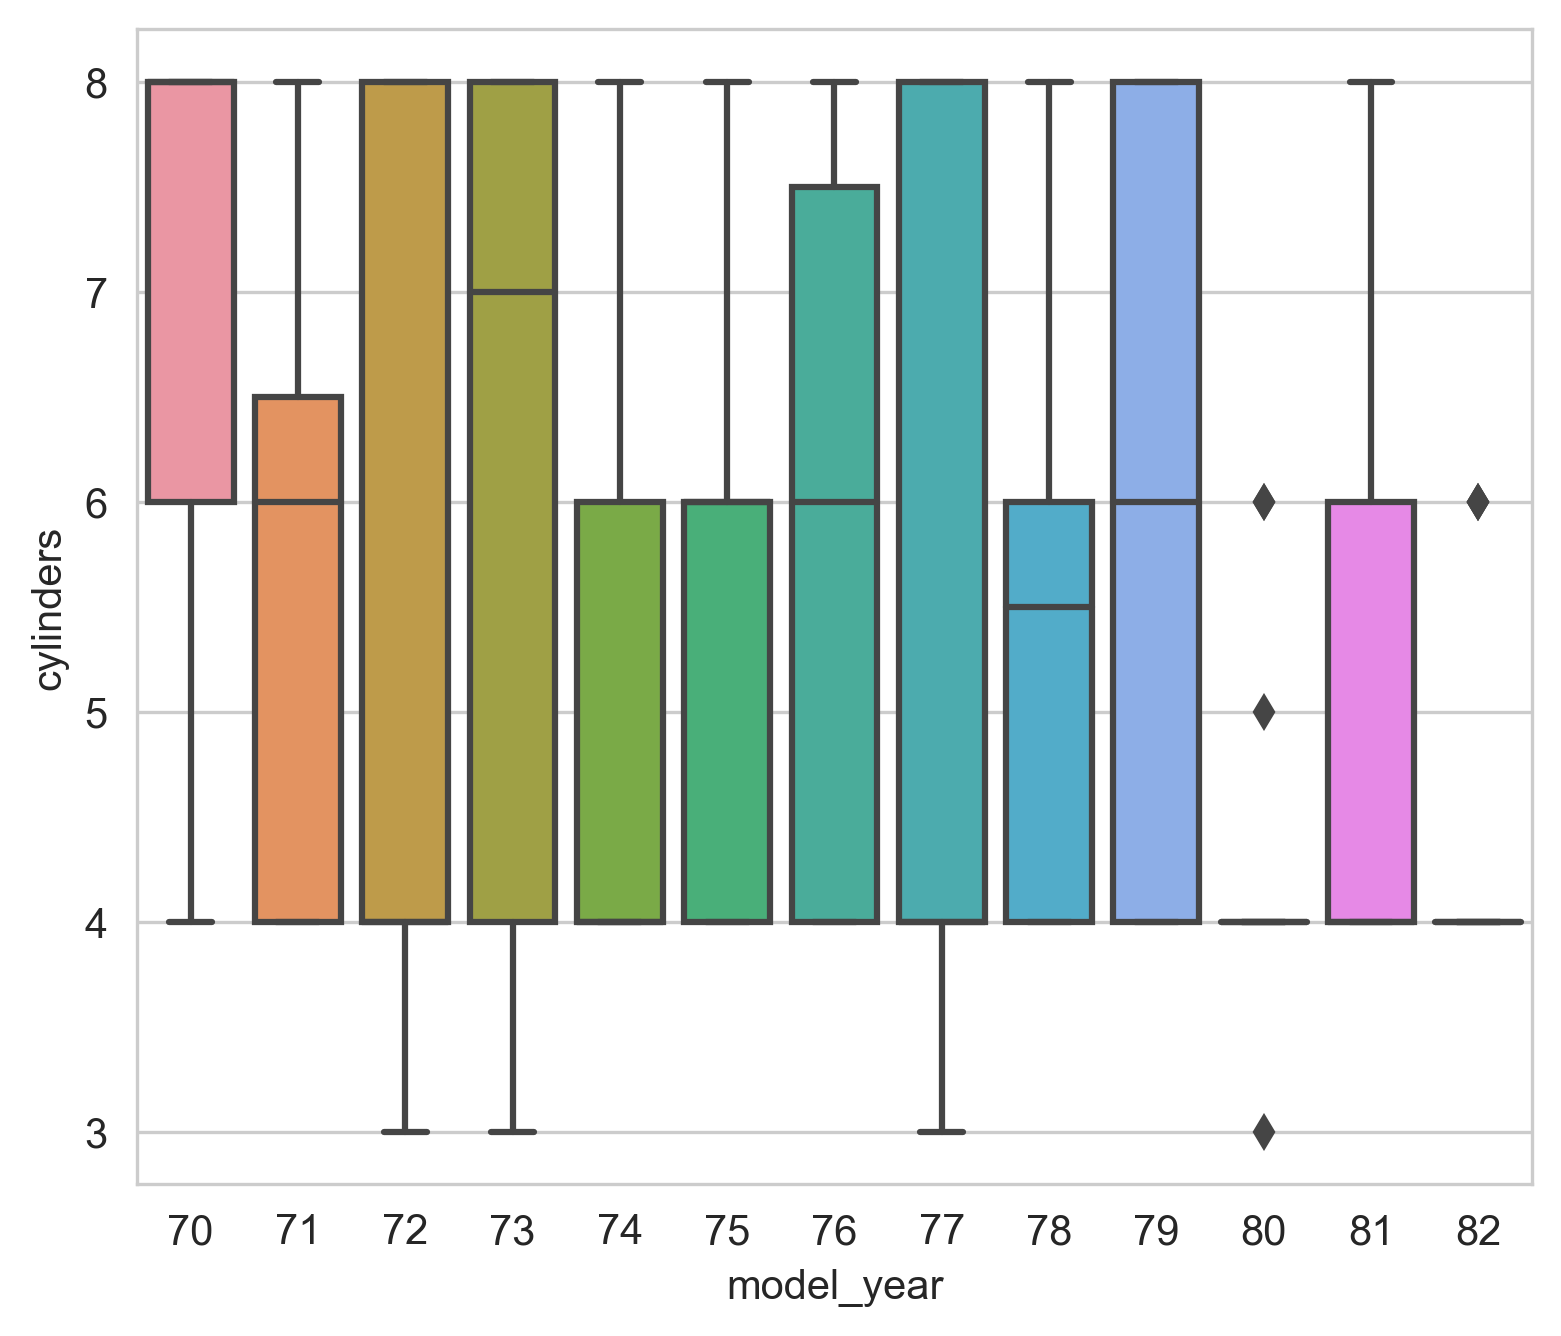

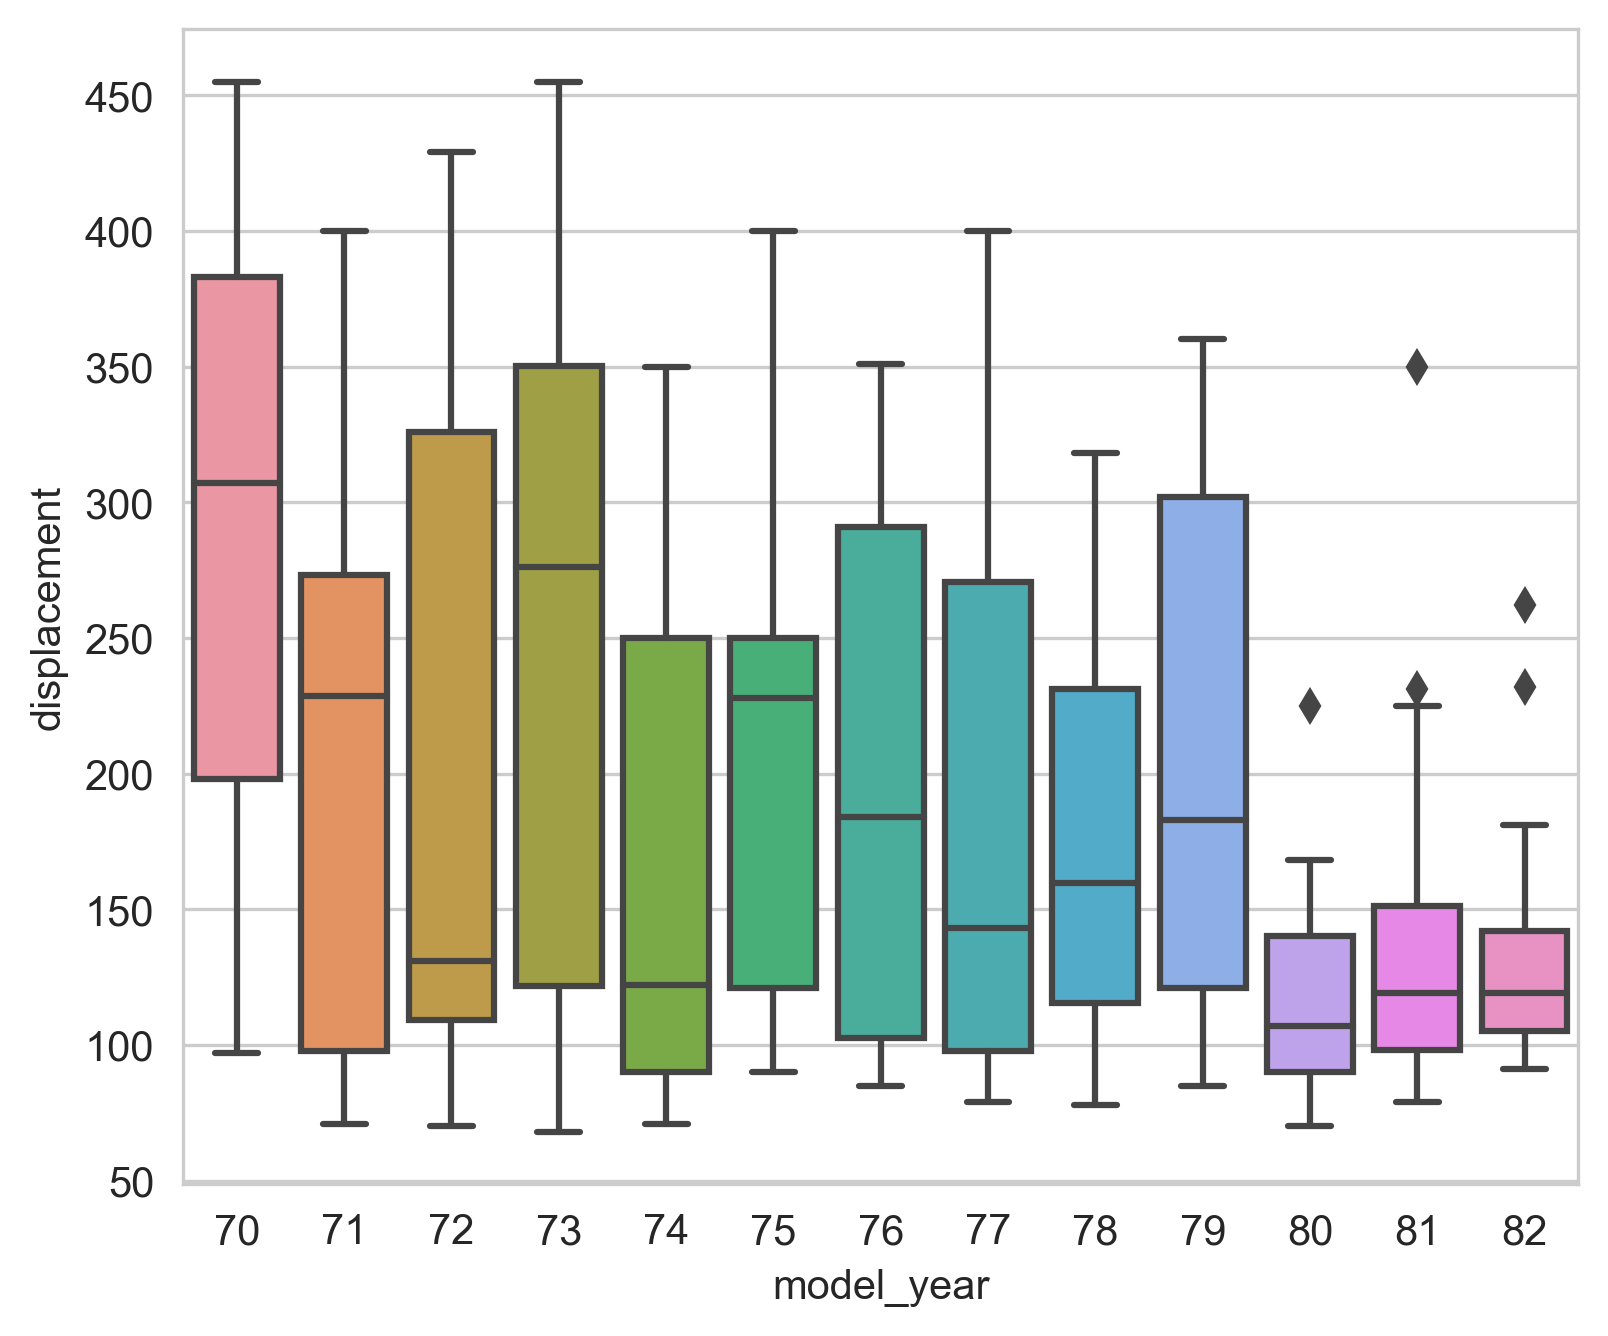

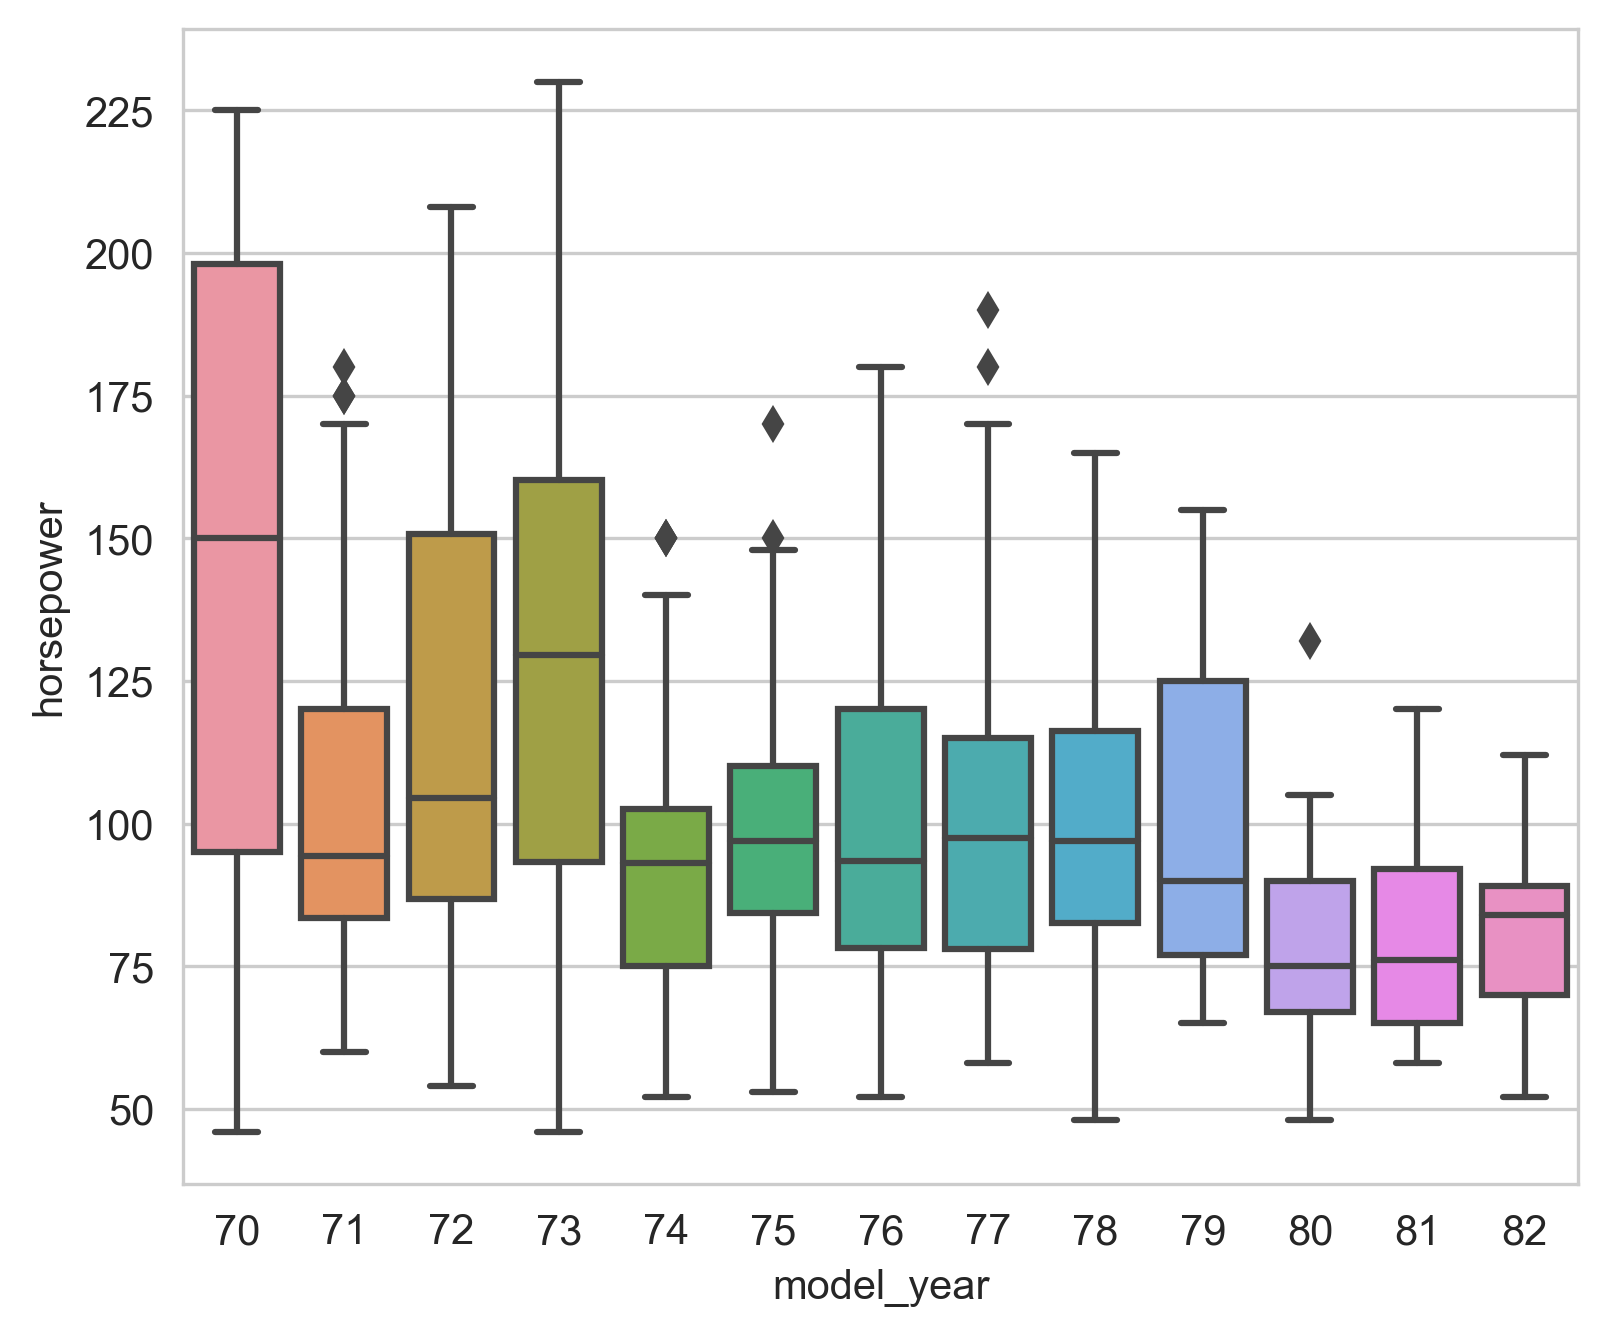

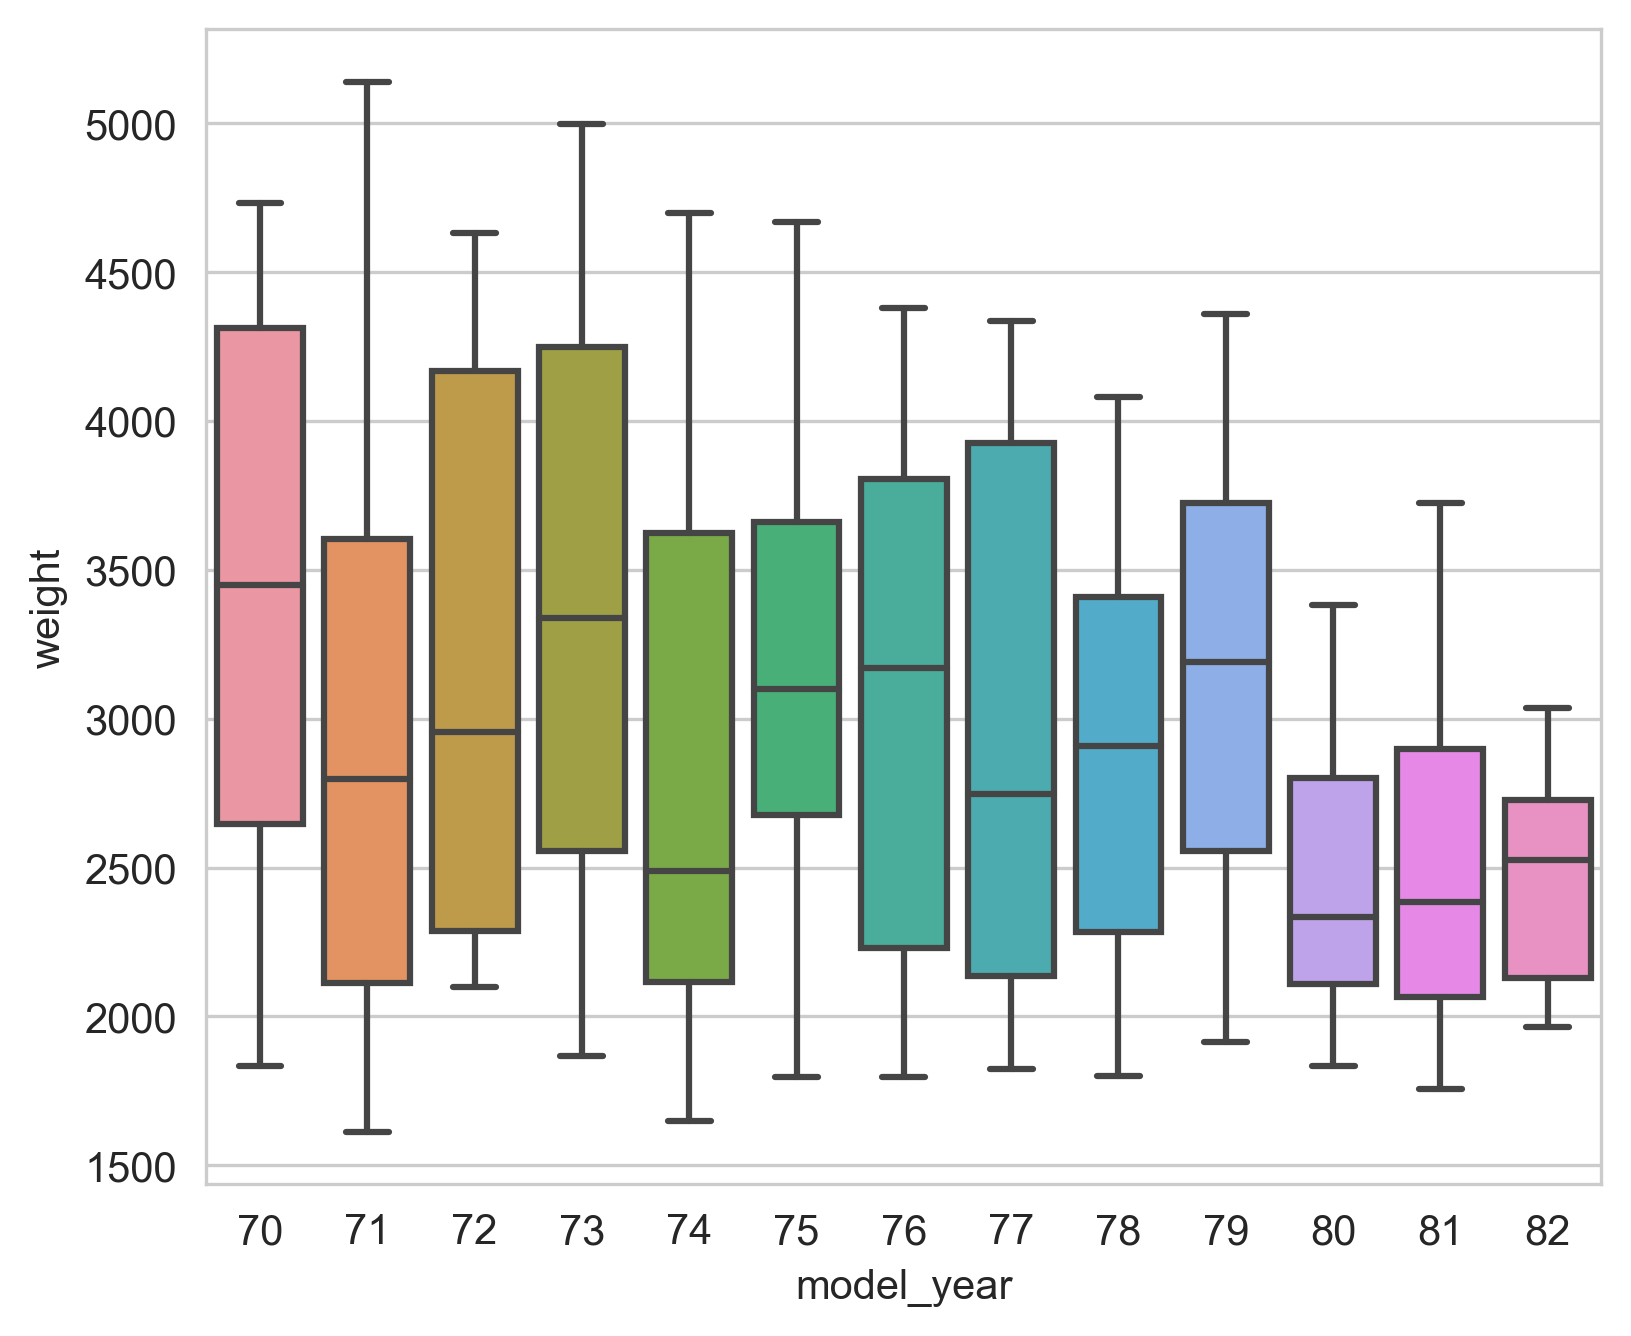

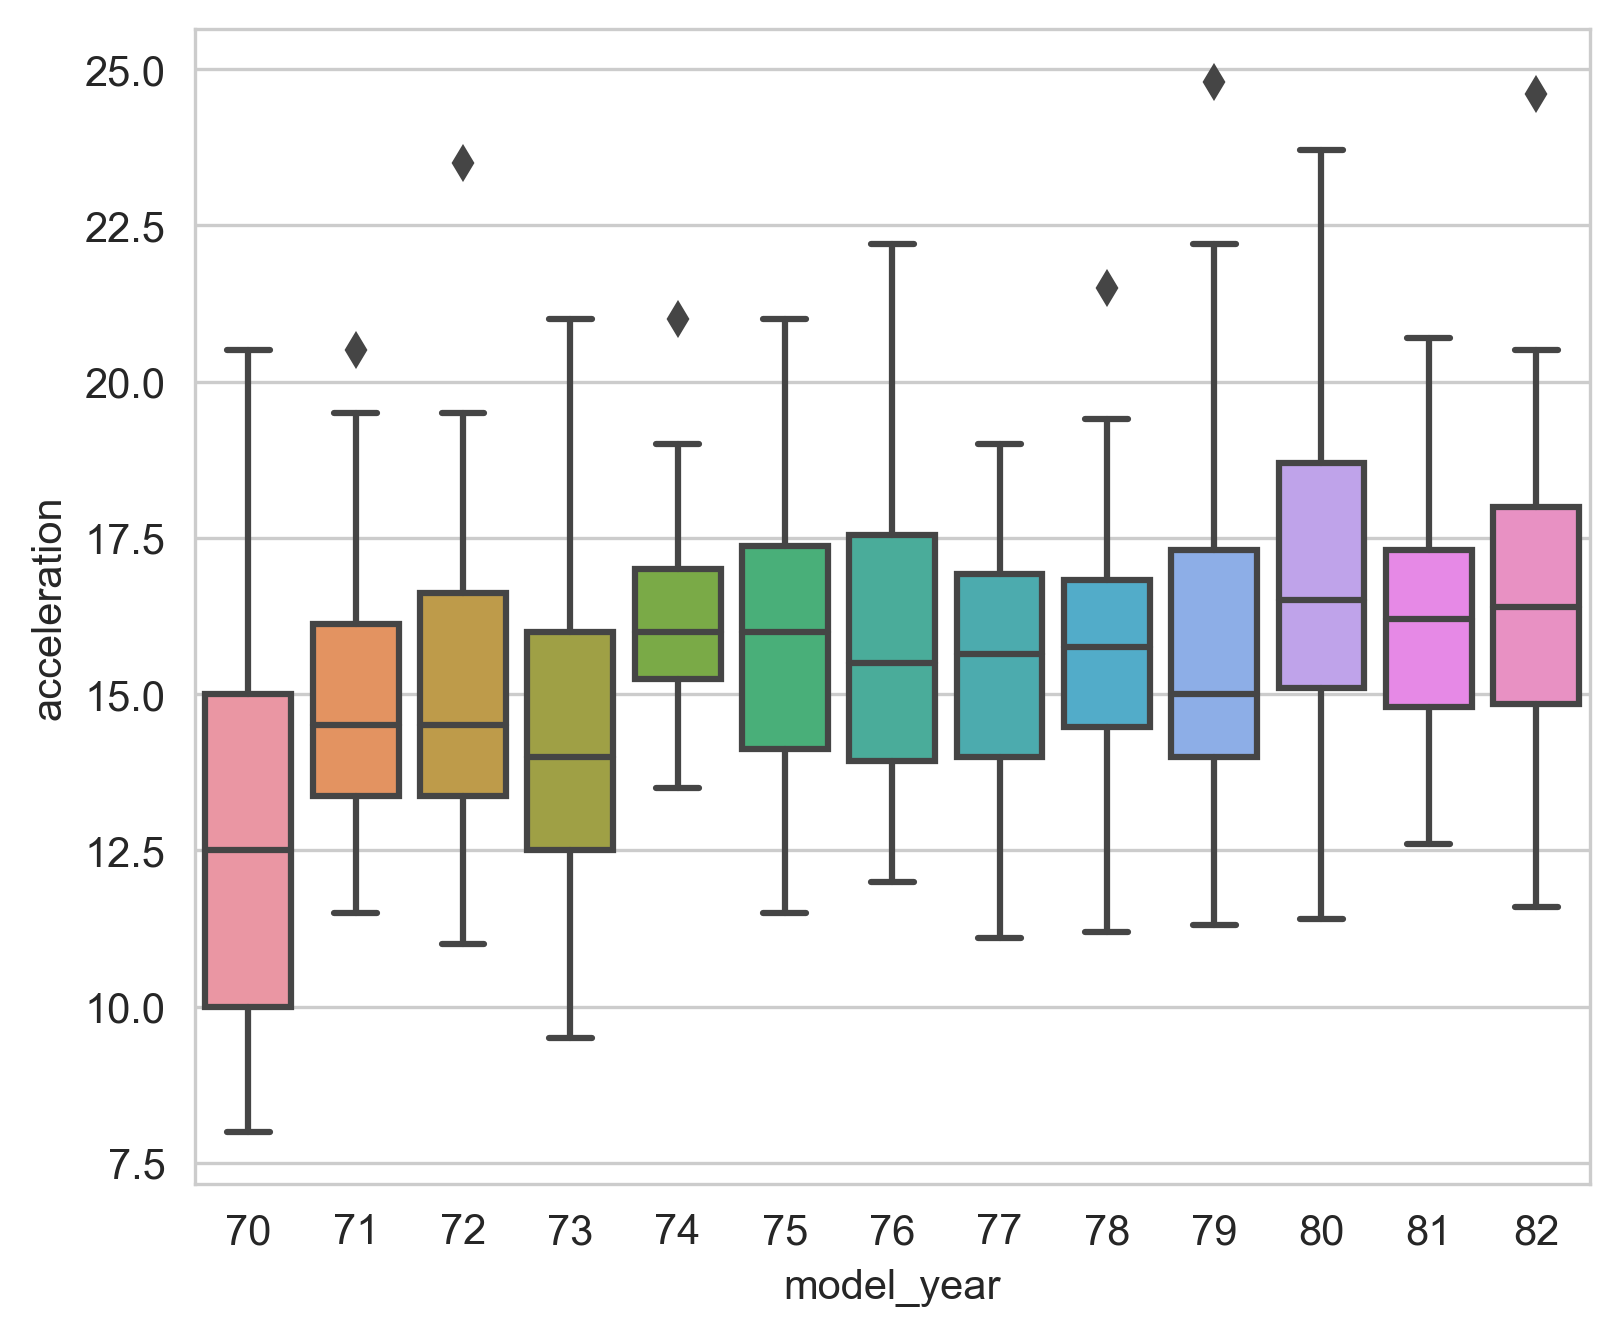

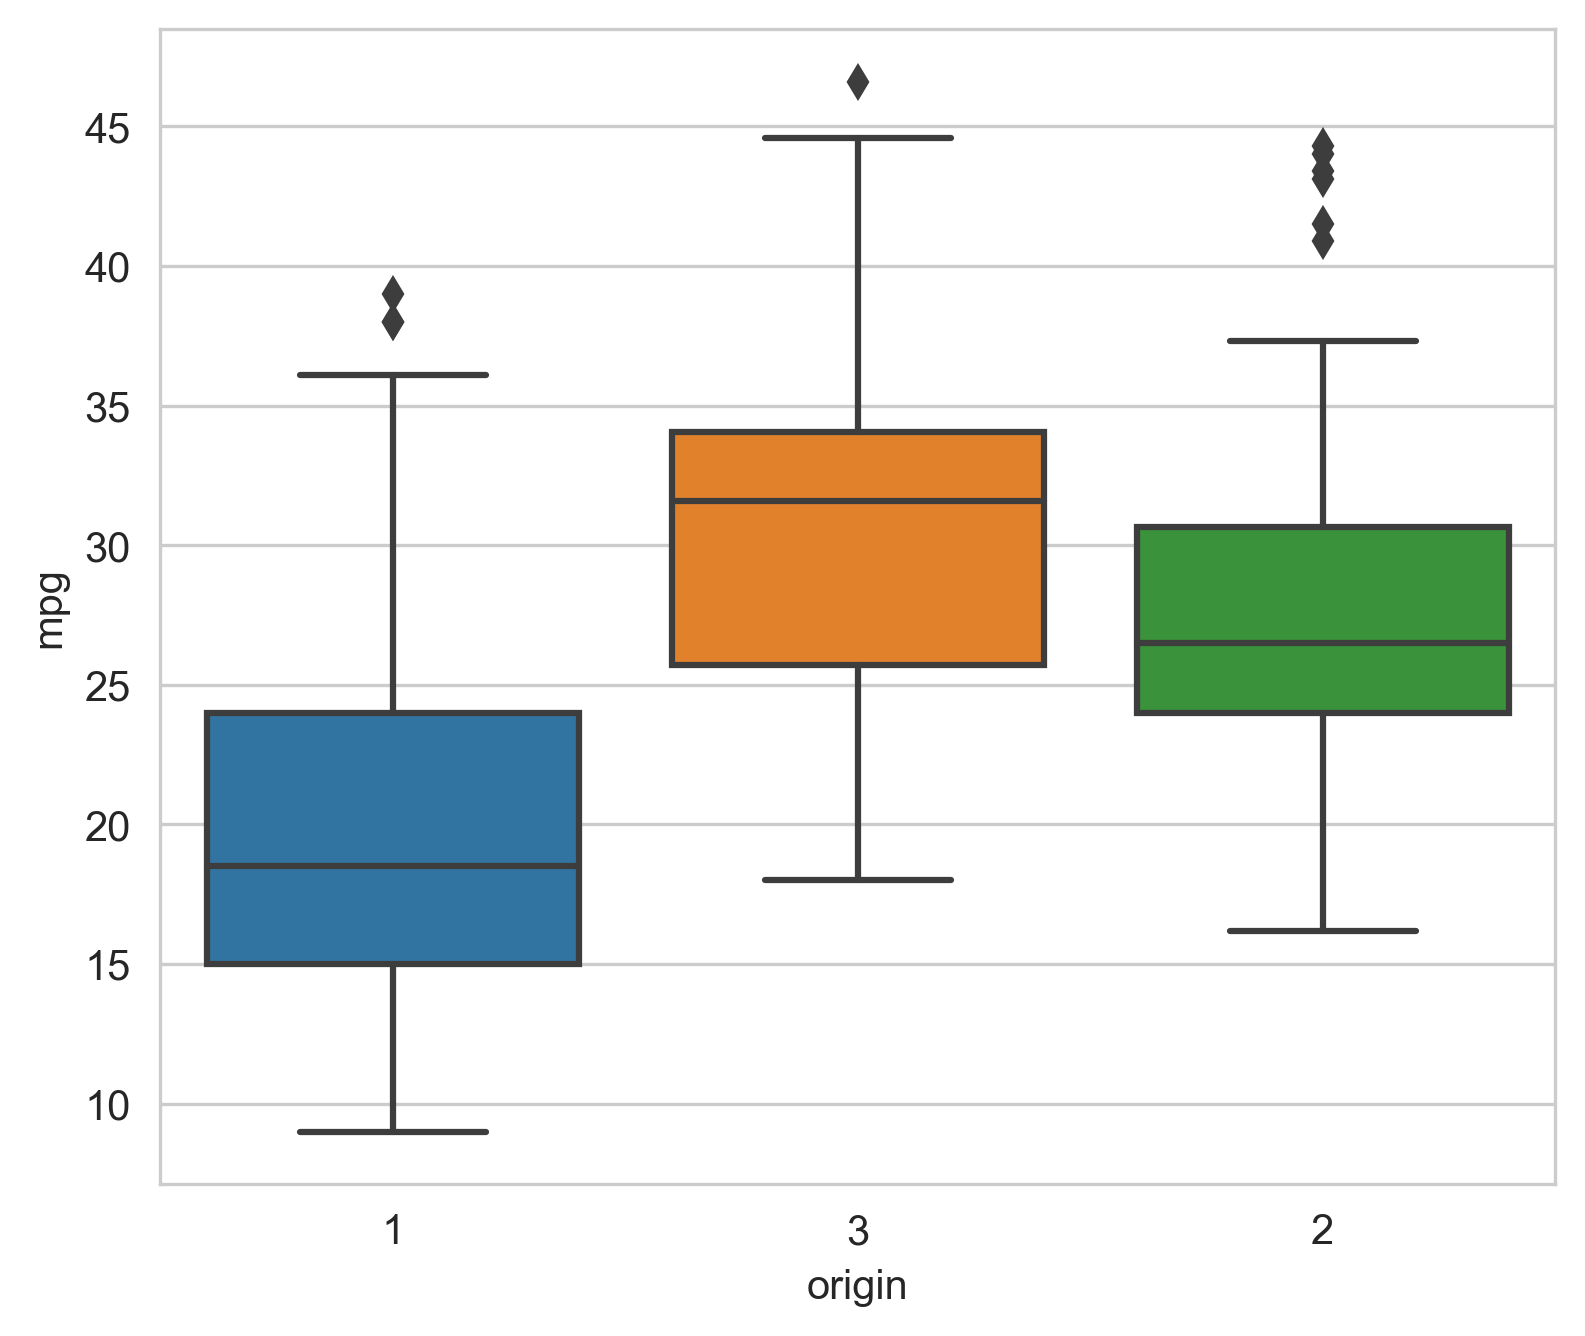

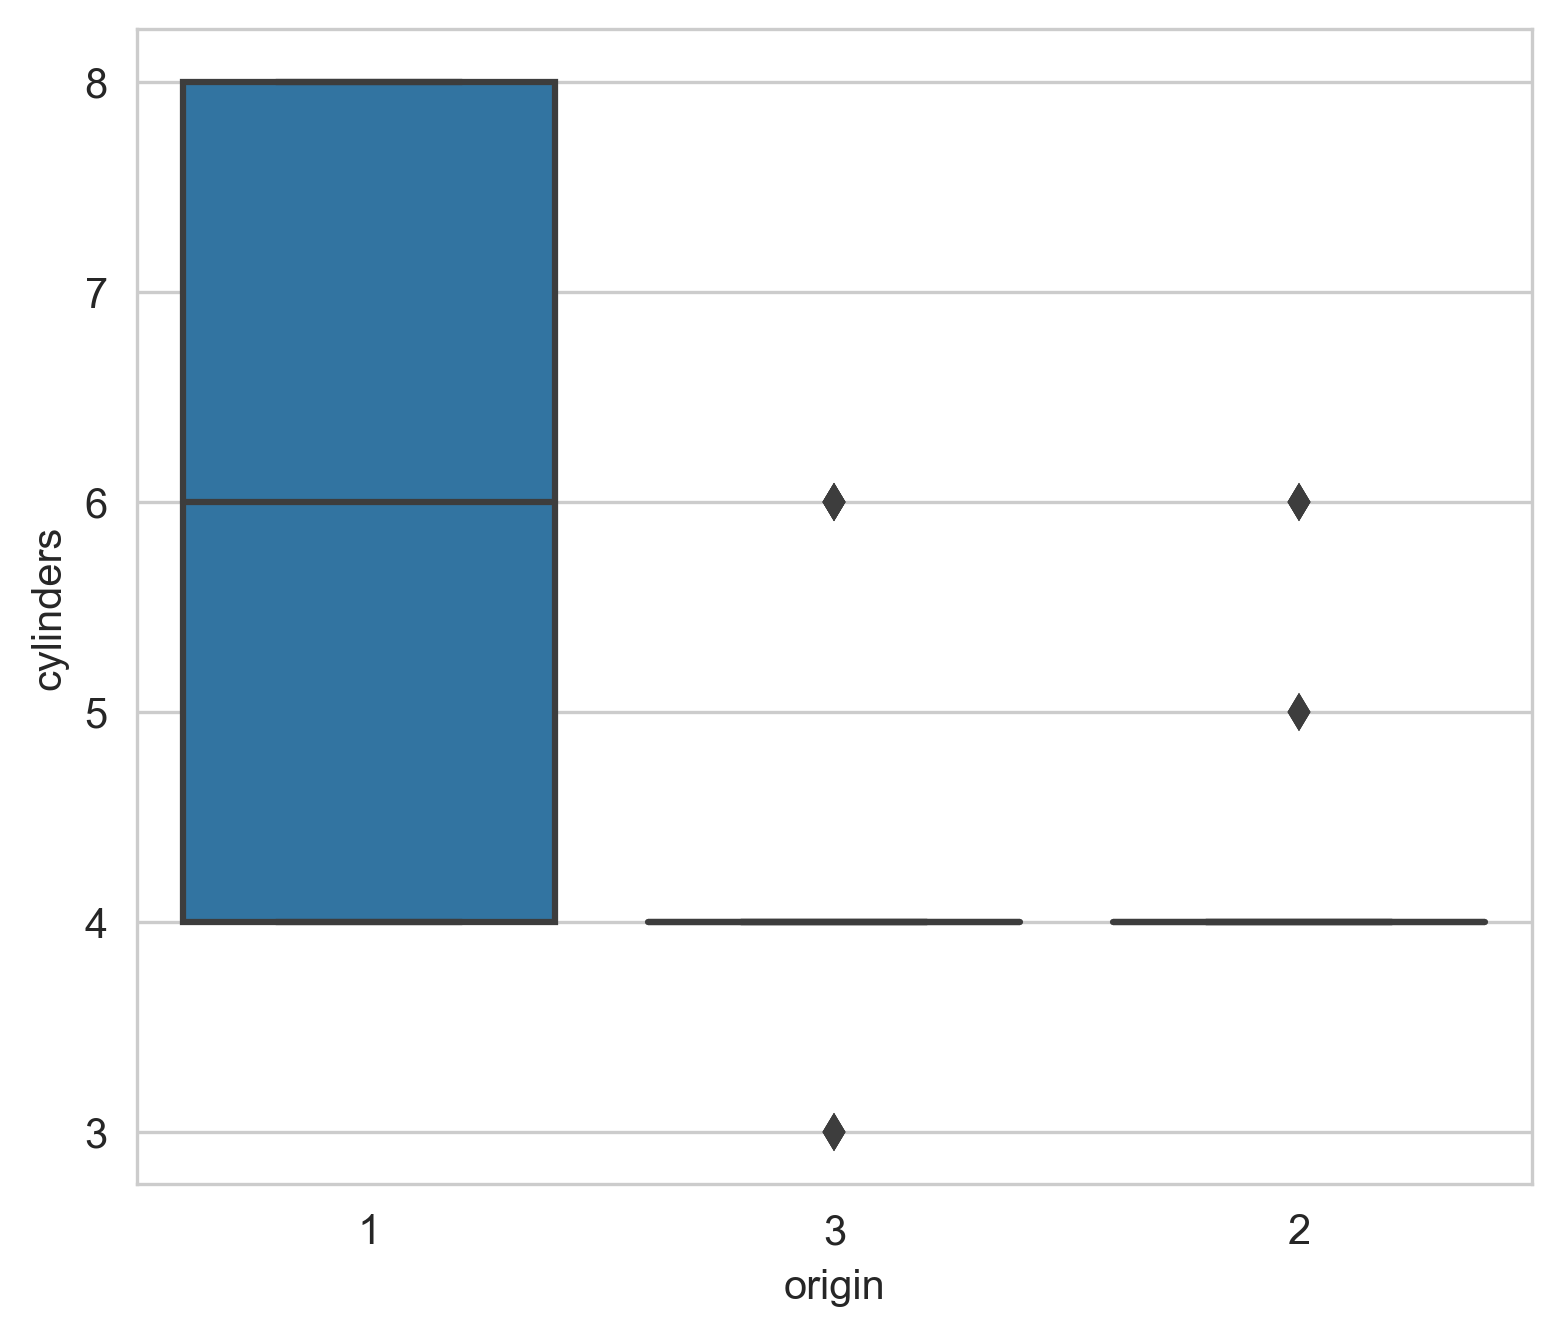

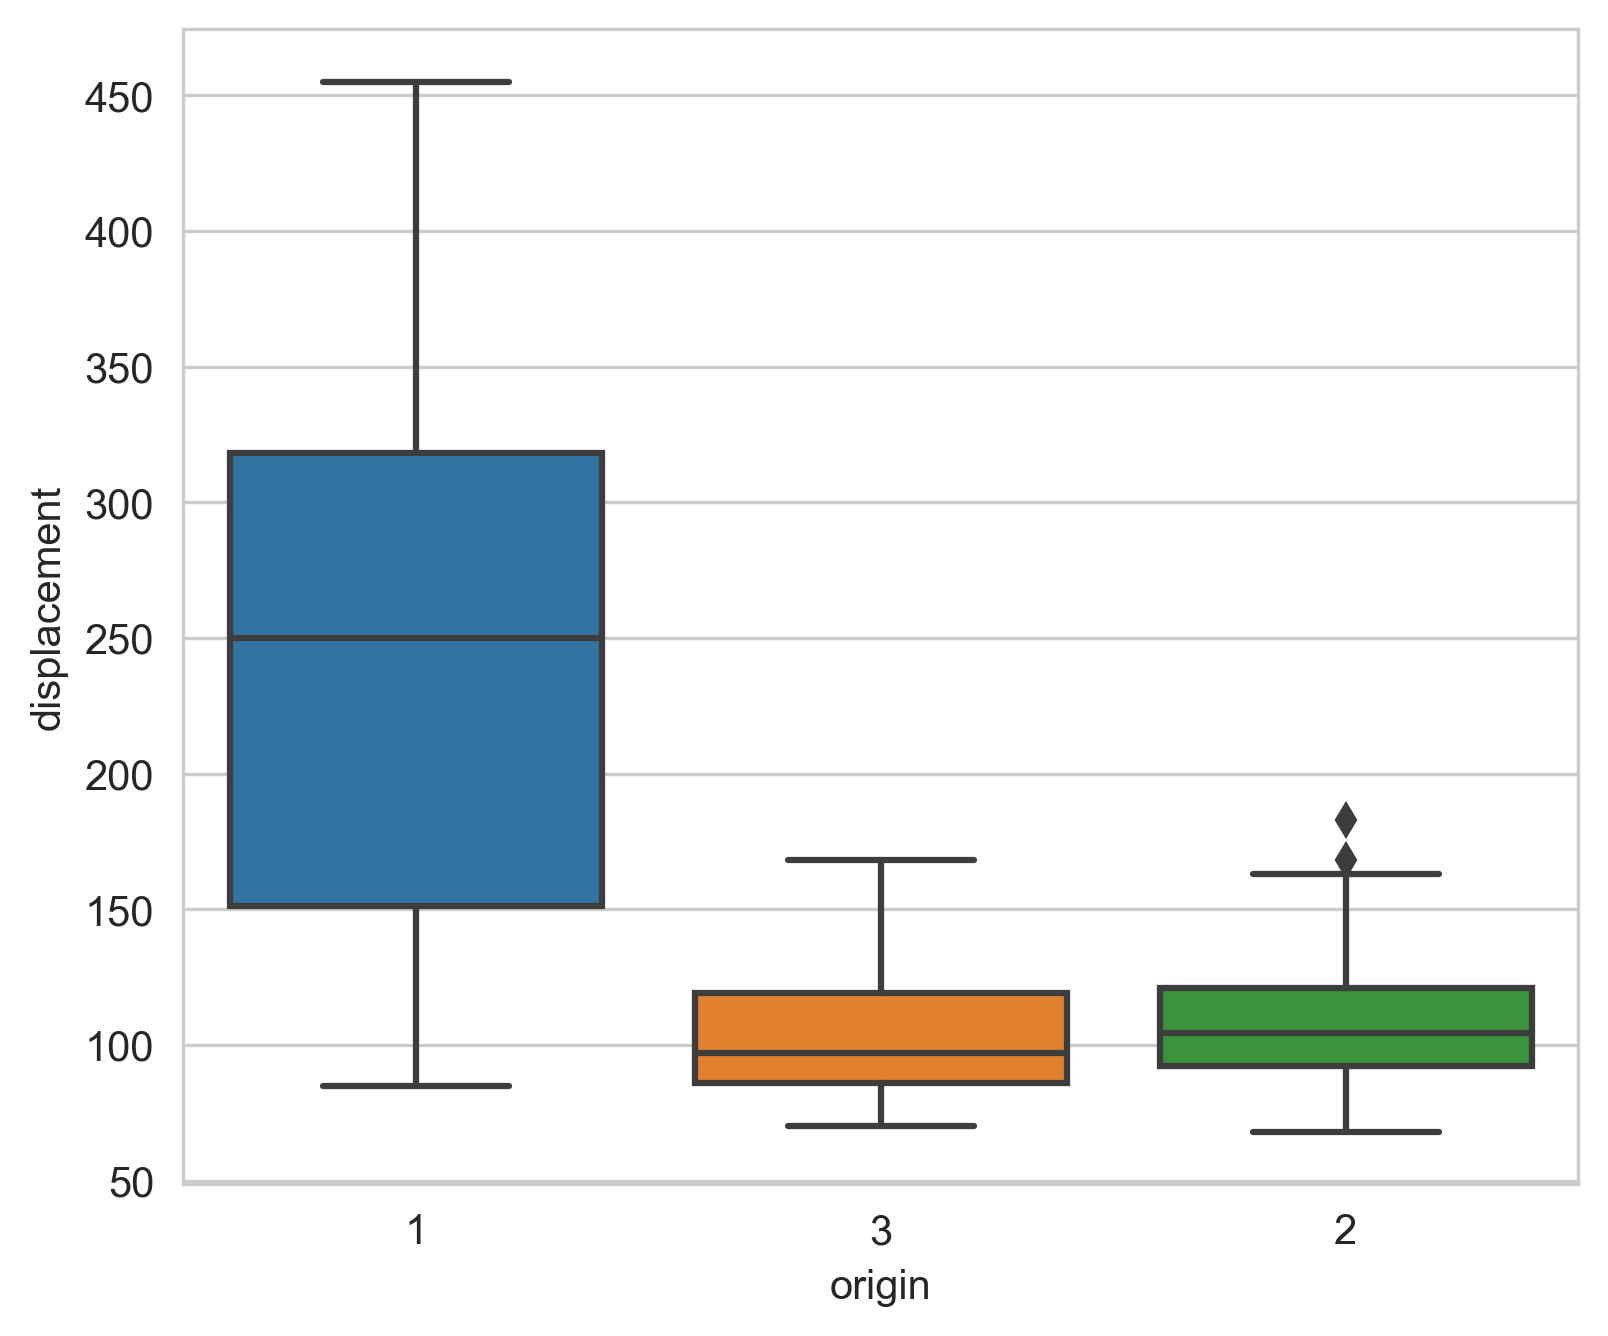

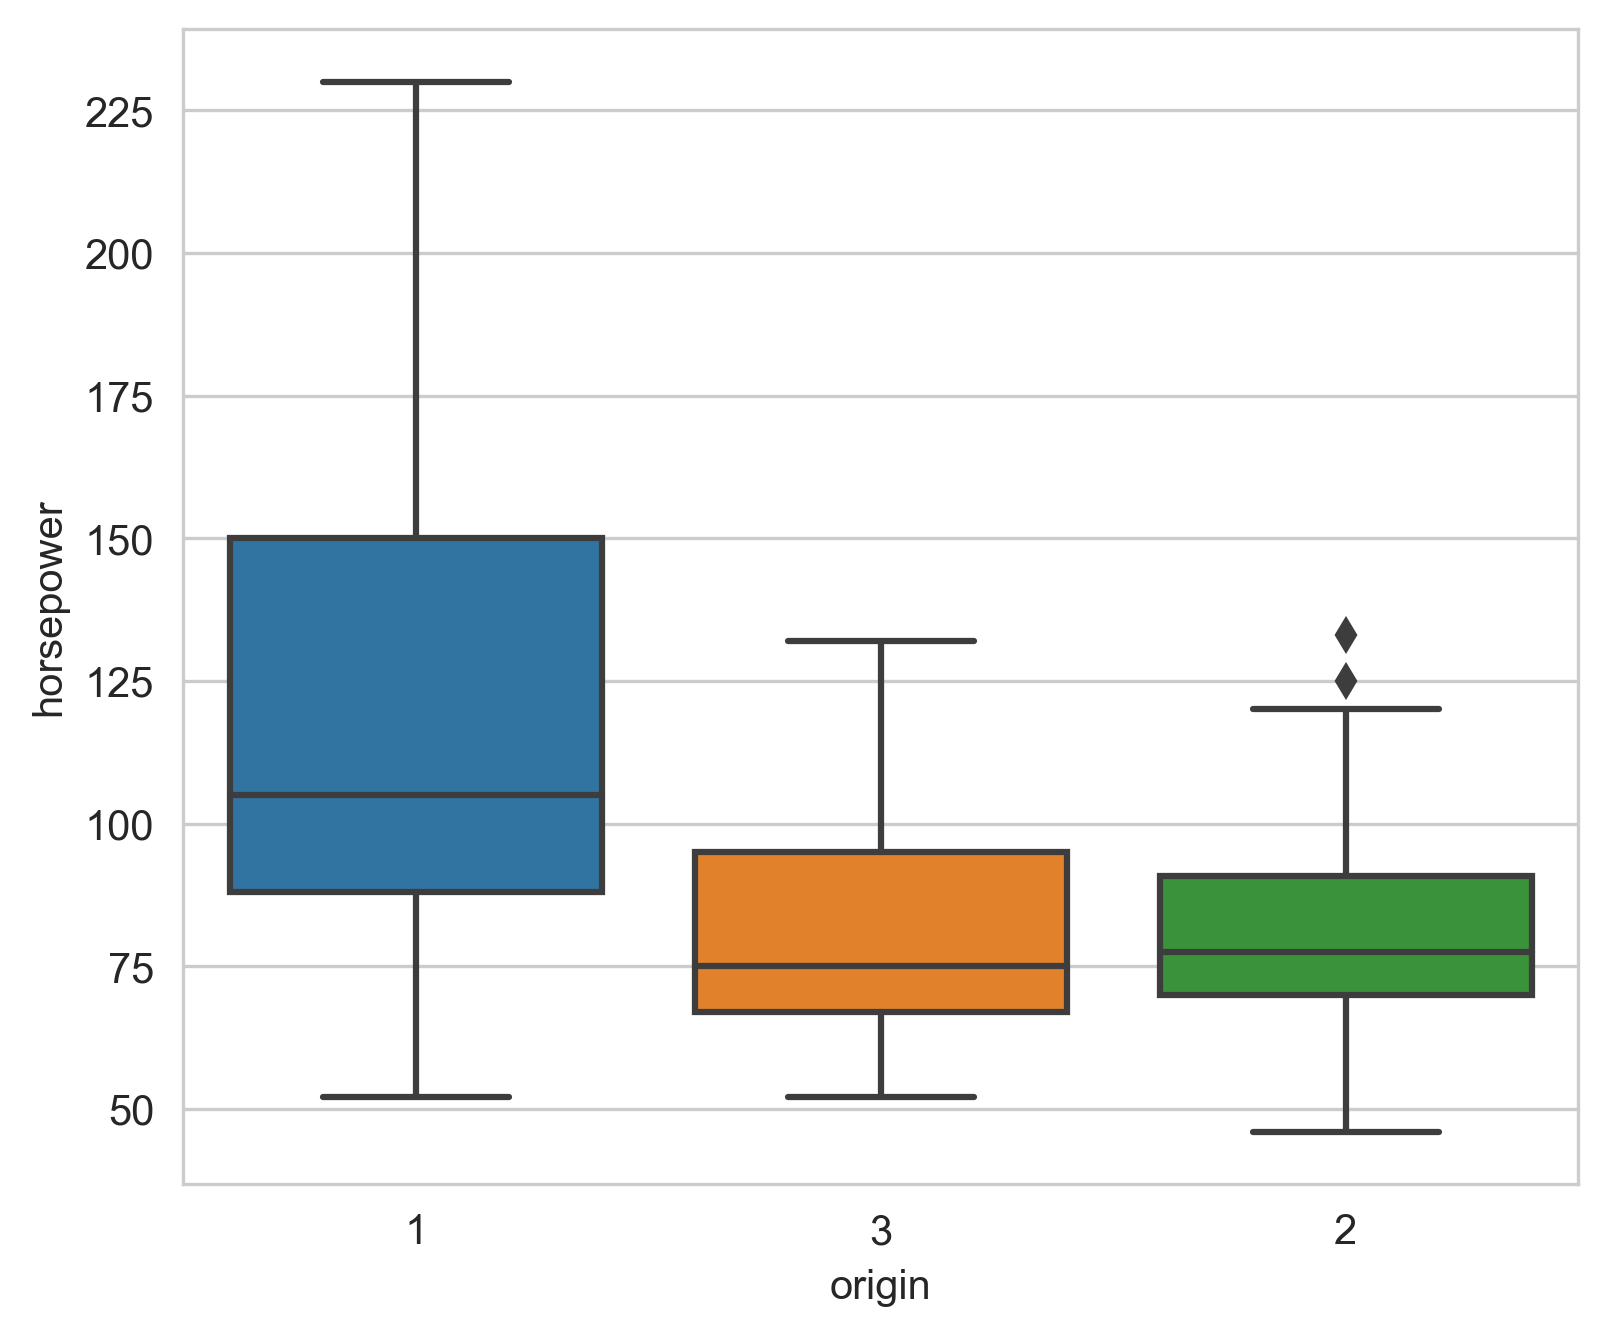

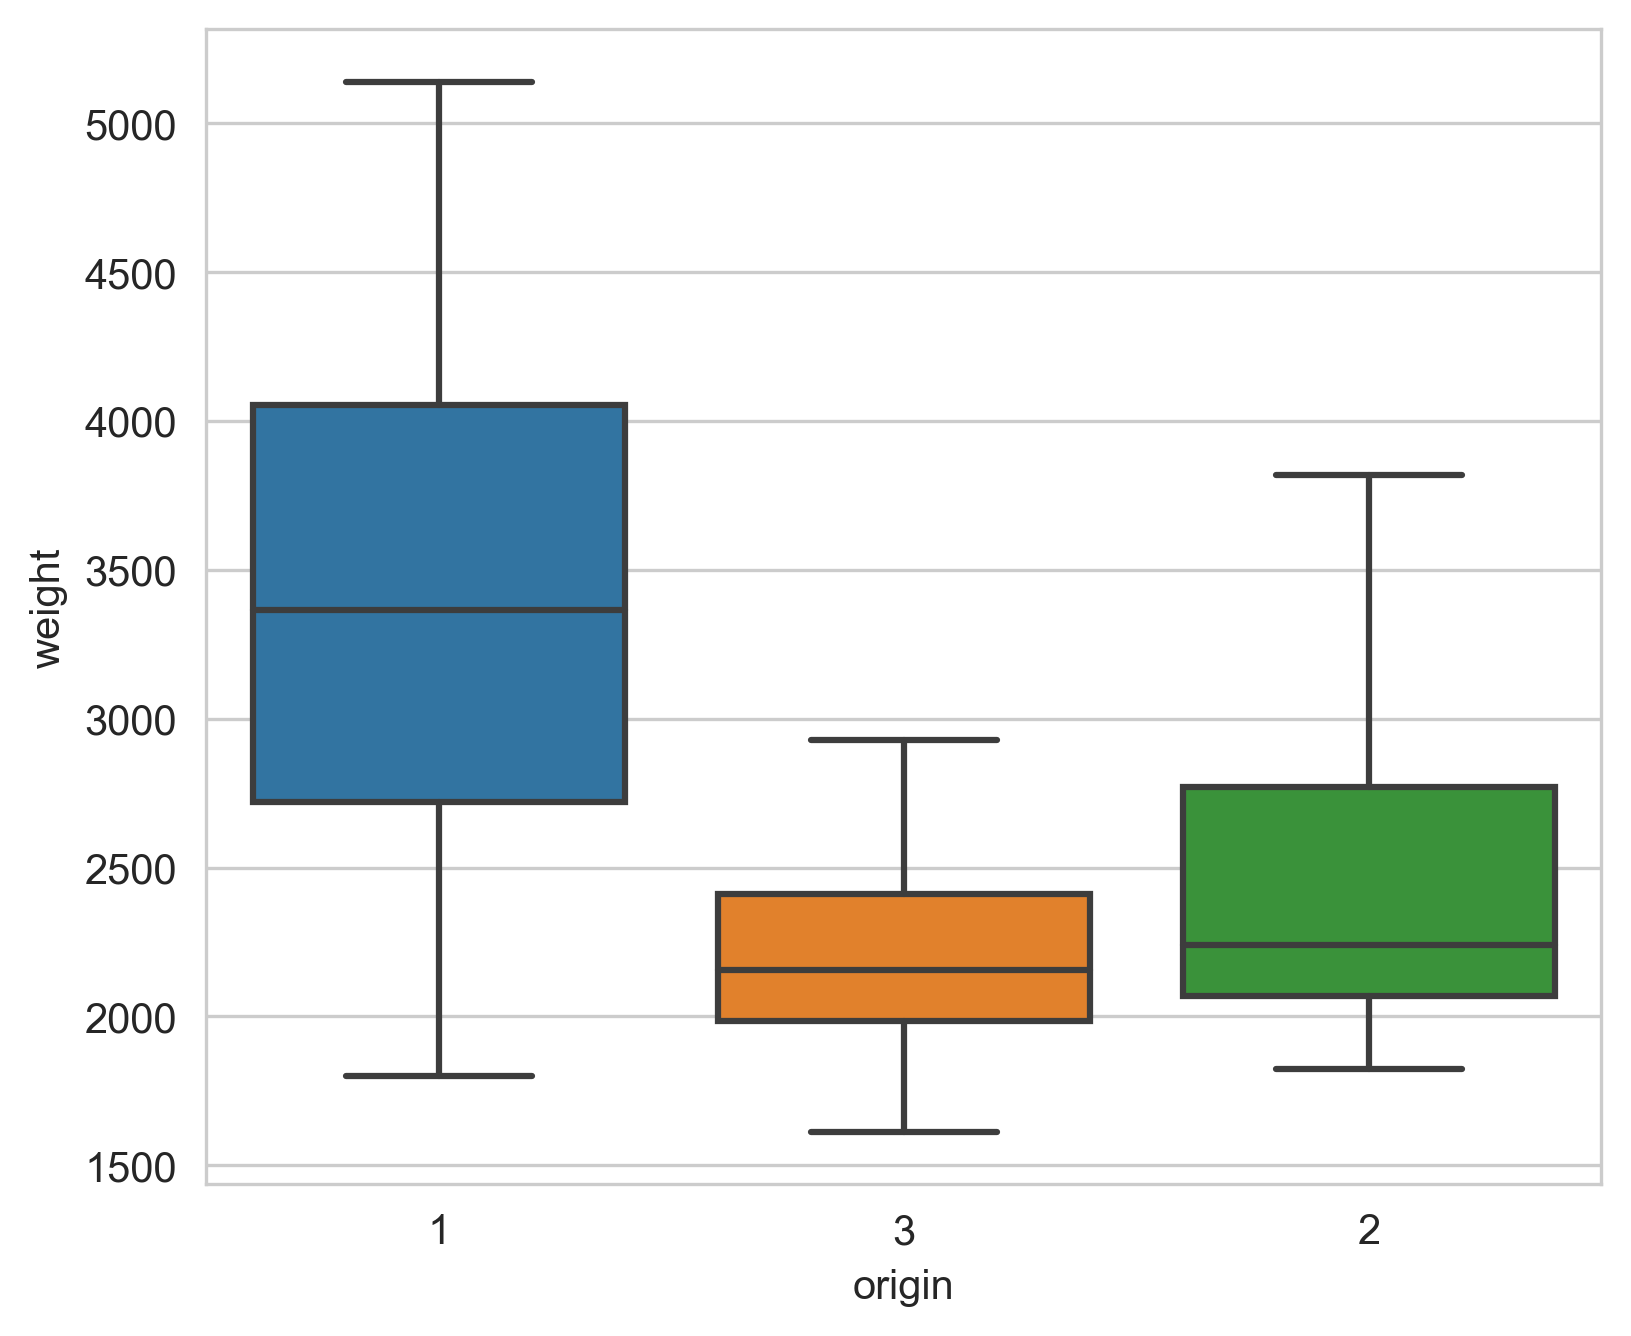

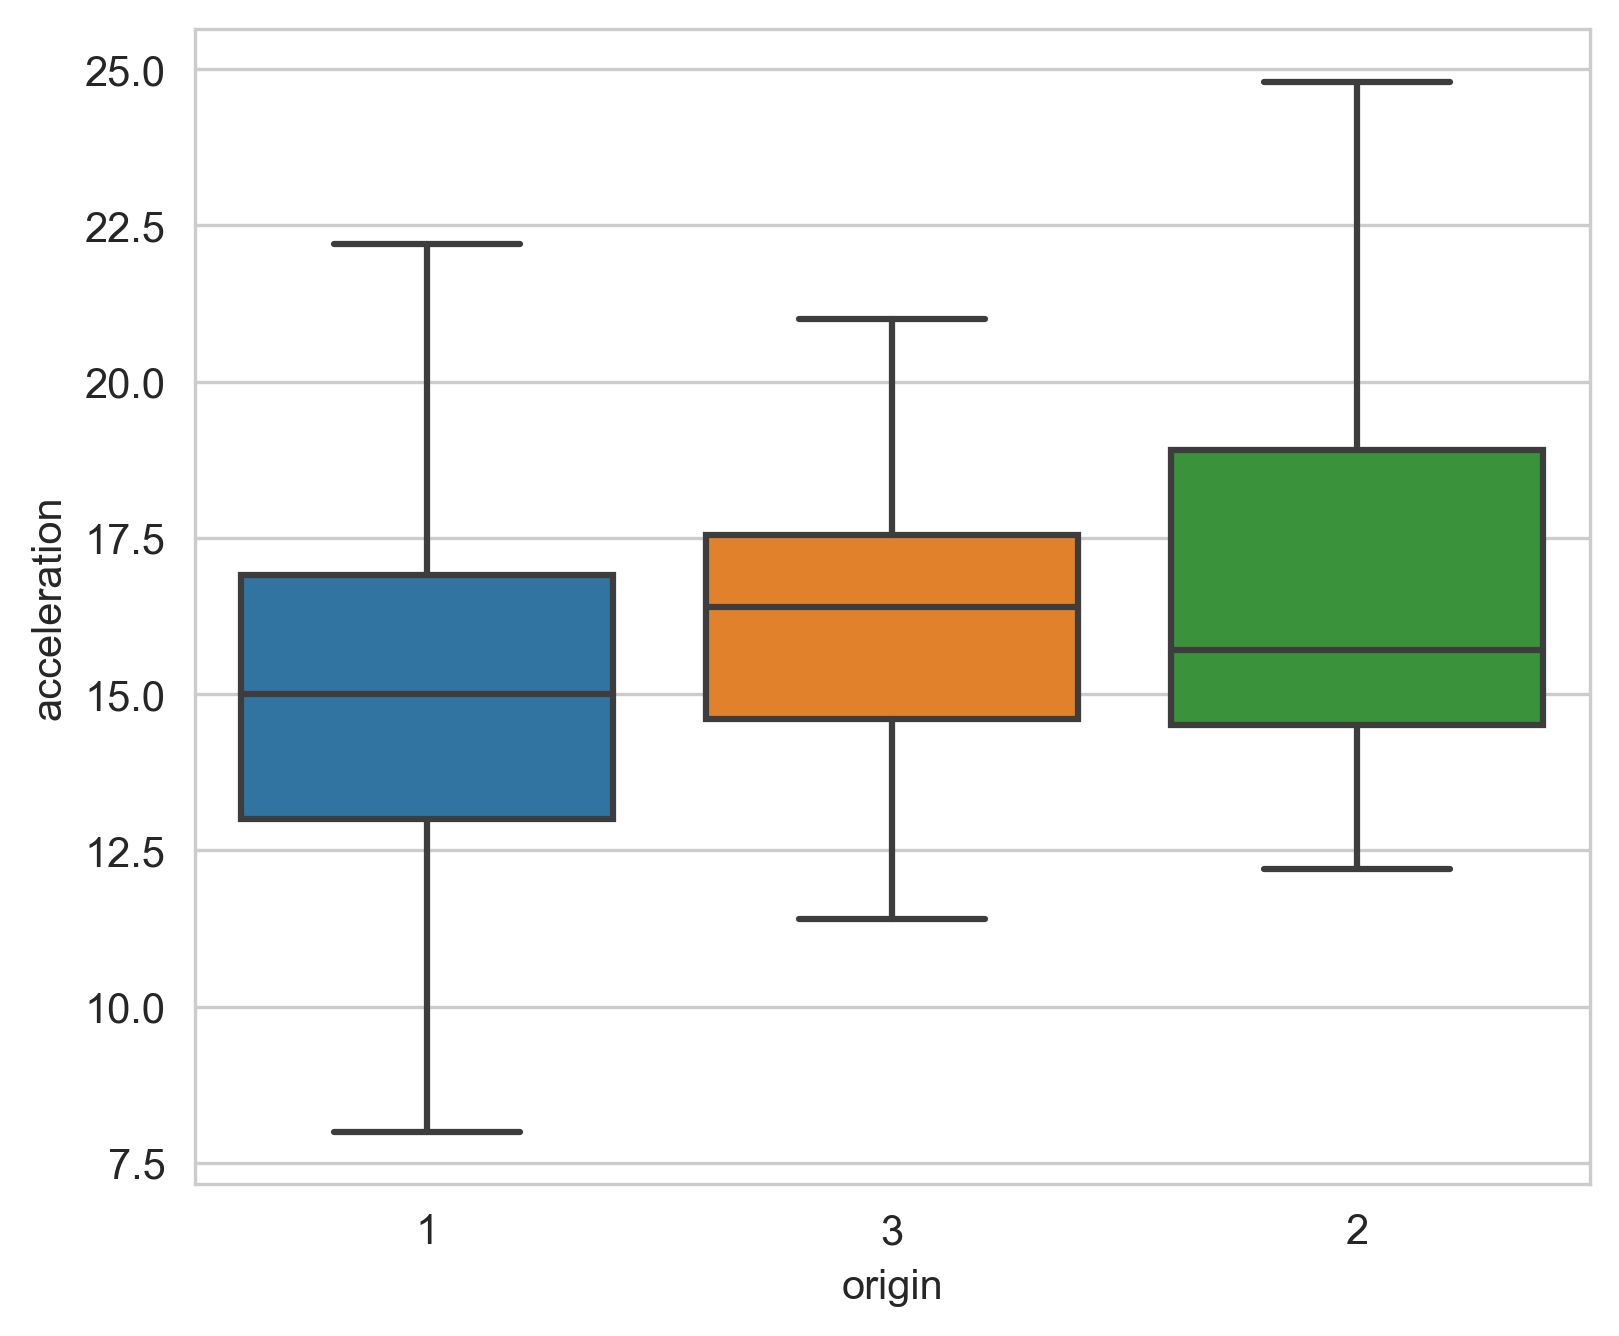

In [21]:
# iterating through all the categorical columns except car_name
for category in cat_columns[:-1]:
    for numbers in num_columns:
        # plotting every combination of boxplots
        plot_boxplot(df, x_col=category,y_col=numbers)

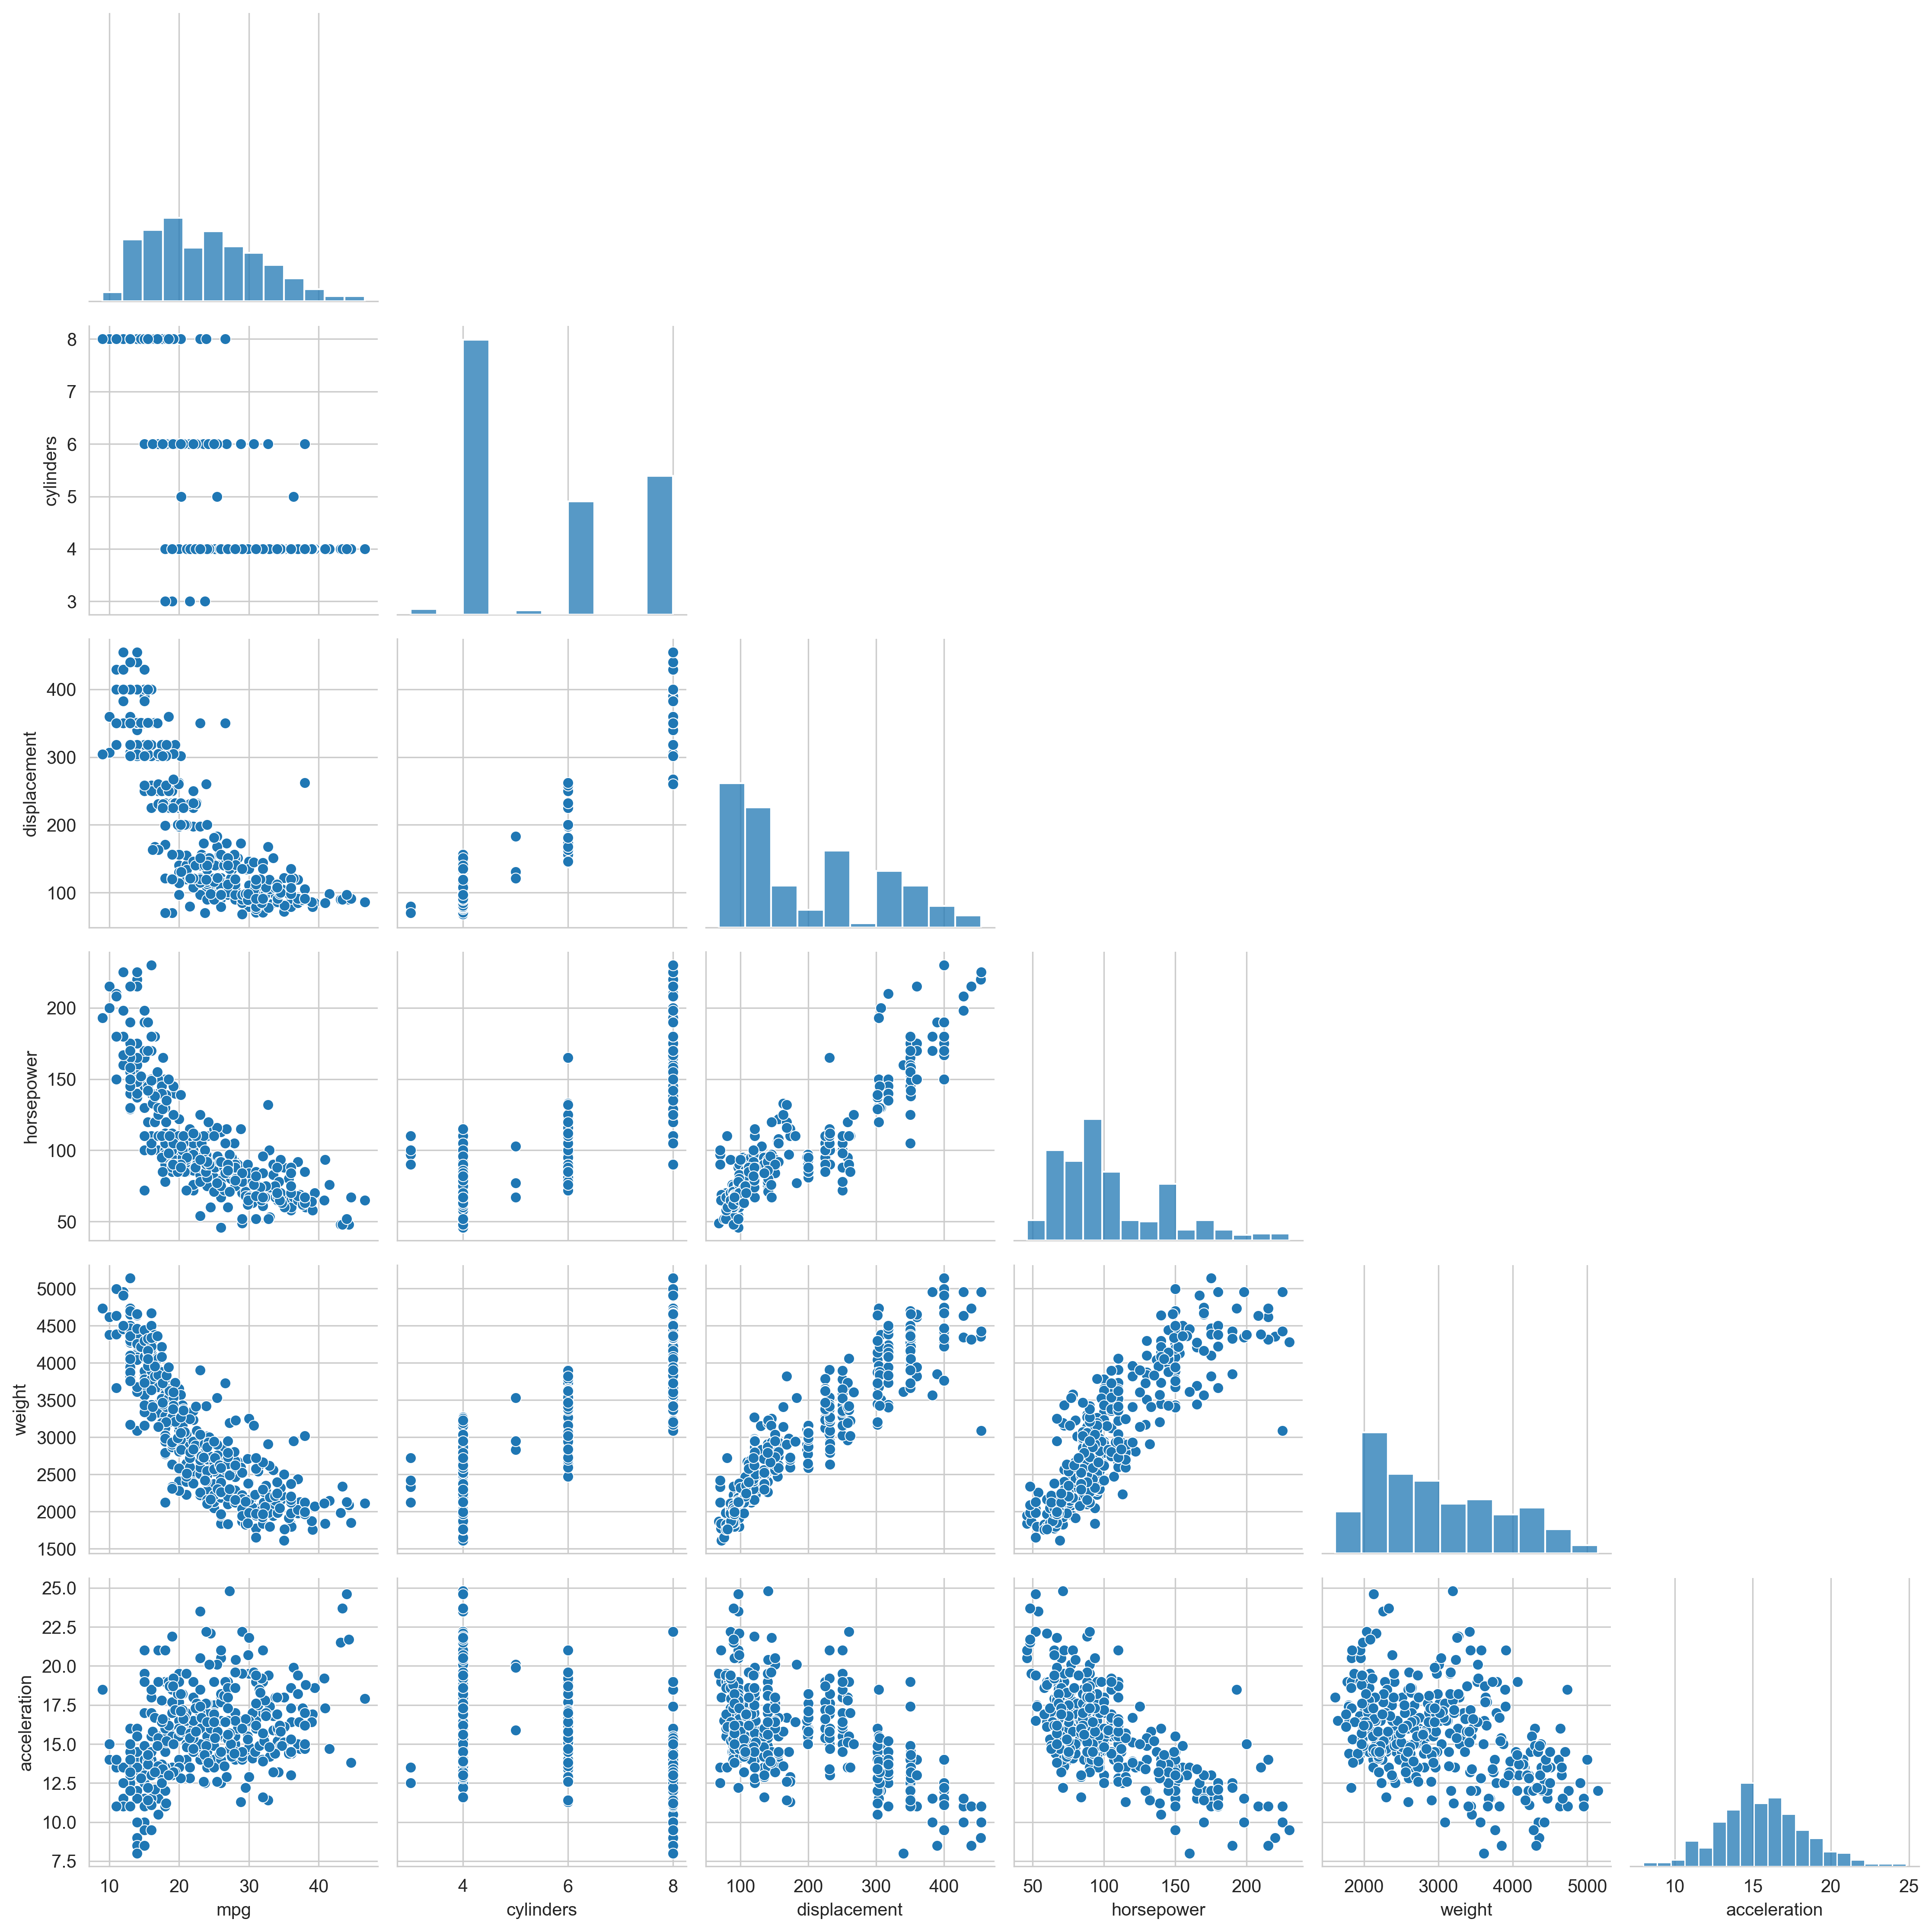

In [24]:
sns.pairplot(df, corner=True);
plt.tight_layout()

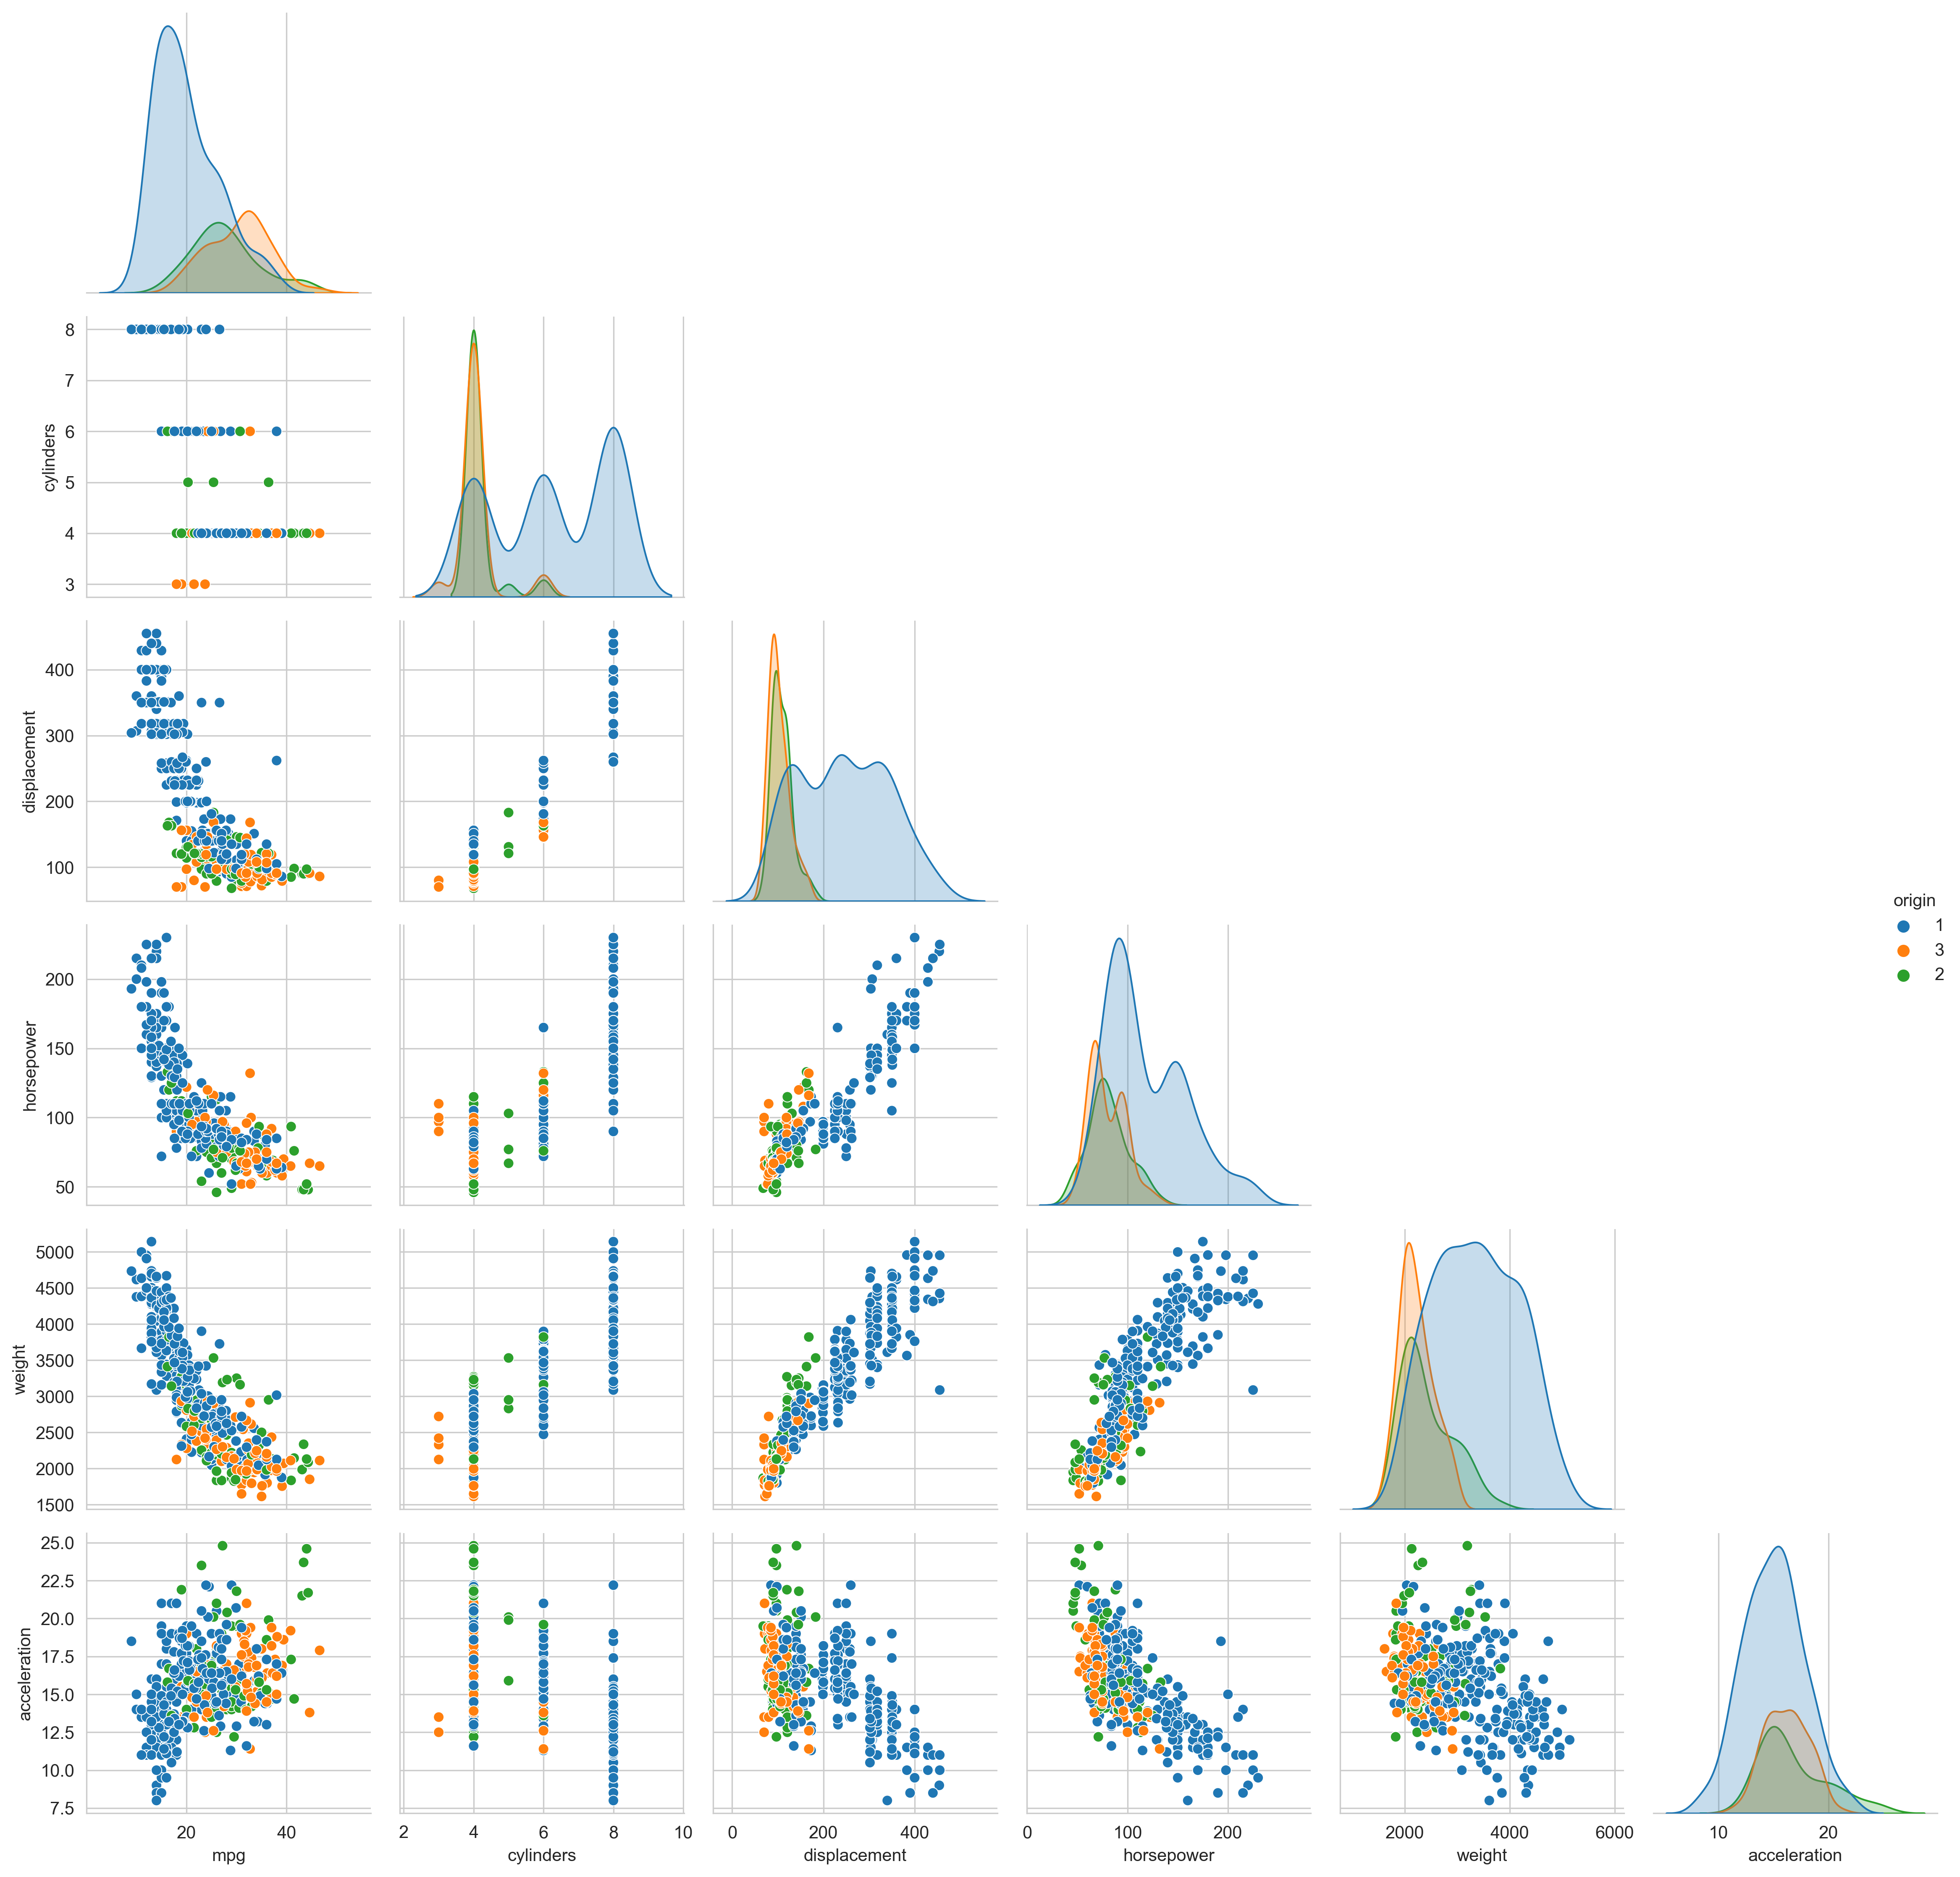

In [26]:
sns.pairplot(df, hue='origin', corner=True);
plt.tight_layout()

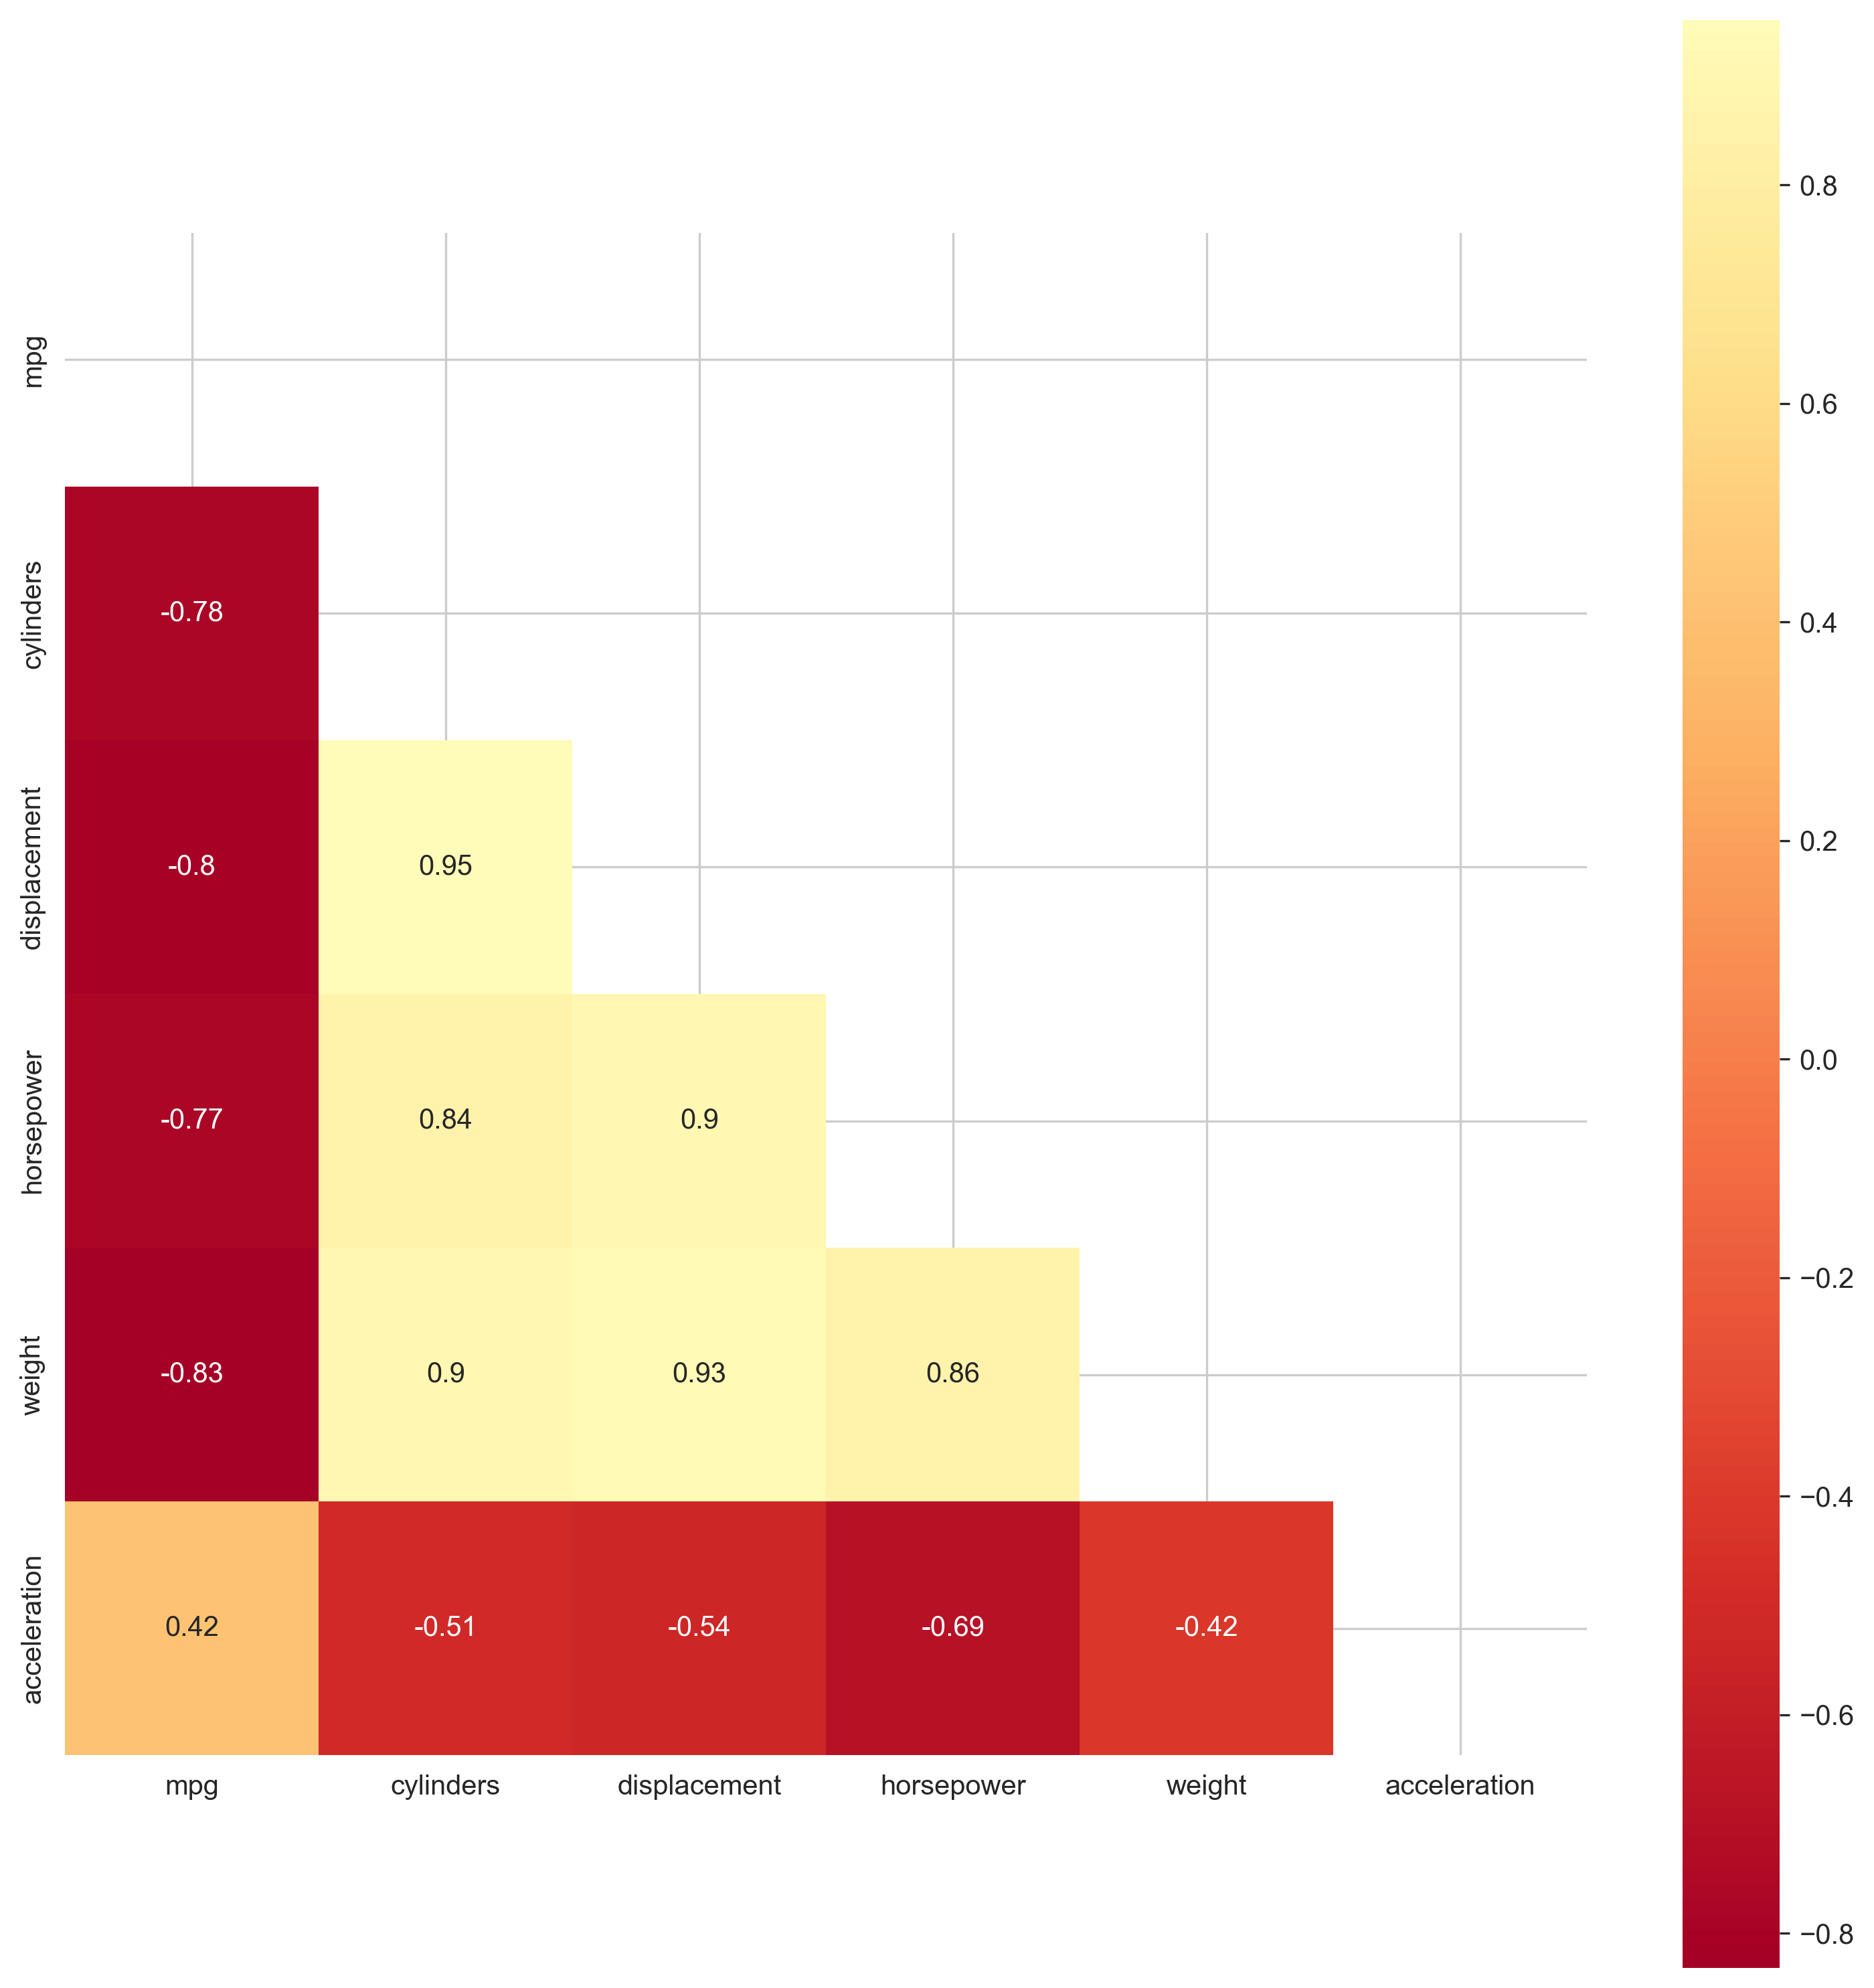

In [36]:
corr = df[num_columns].corr()
plot_corr(corr,annot=True,center=True,square=True)

In [1]:
from sklearn.cluster import KMeans

In [2]:
df.columns

NameError: name 'df' is not defined

In [ ]:
scaler = StandardScaler()
encoder = LabelEncoder()

df[['year']]